In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, balanced_accuracy_score
from rdkit import Chem
from rdkit.Chem import Draw

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
import os
path_to_figure_folder = os.path.join(os.getcwd(), 'figures/predictions_on_unseen_substrate')
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 16


# Objective 4: Predictions within a substrate class, but iteratively a smaller subset of ligands is selected so we can see the effect on the performance of the model

This case is mainly focused on regression models, since we wanted to investigate the bad performance

## Example application of pipeline

Training and testing regression
Test size: 0.2
Mean test performance: 0.10 +/- 0.16
Best training model performance: 0.69
Best training model parameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test set performance r2:  -0.21051921330579693
Mean test performance: -0.03 +/- 0.13
Best training model performance: 0.62
Best training model parameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test set performance r2:  0.1731779667095683
Mean test performance: -0.16 +/- 0.20
Best training model performance: 0.62
Best training model parameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Test set performance r2:  0.04947140500571945
Mean test performance: 0.01 +/- 0.10
Best training model performance: 0.59
Best training model parameters: {'bootstrap': Fa

C:\Users\avkalikadien\Documents\PhD\2021-2022\Janssen\obelix-ml-pipeline\obelix_ml_pipeline\machine_learning.py:123: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



Mean test performance: 0.00 +/- 0.27
Best training model performance: 0.93
Best training model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Test set performance r2:  -0.06193401013058297
Mean test performance: -0.06 +/- 0.12
Best training model performance: 0.68
Best training model parameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Test set performance r2:  -0.17917494243058085
Mean test performance: -0.04 +/- 0.10
Best training model performance: 0.79
Best training model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Test set performance r2:  -0.04360832294883332
Mean test performance: 0.03 +/- 0.09
Best training model performance: 0.62
Best training model parameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 3,

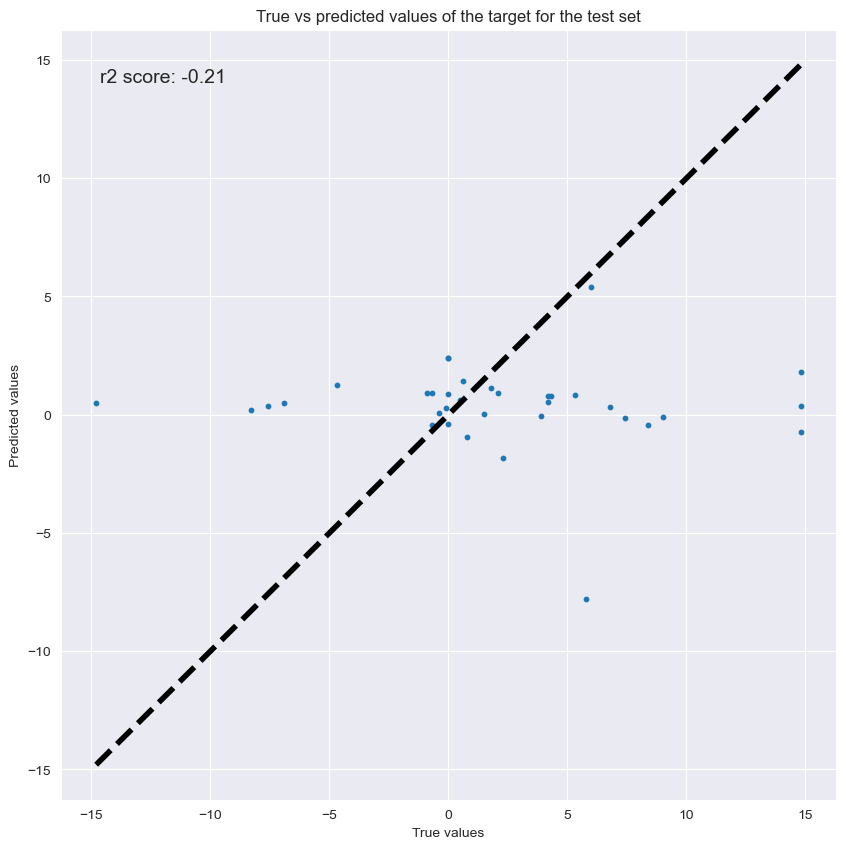

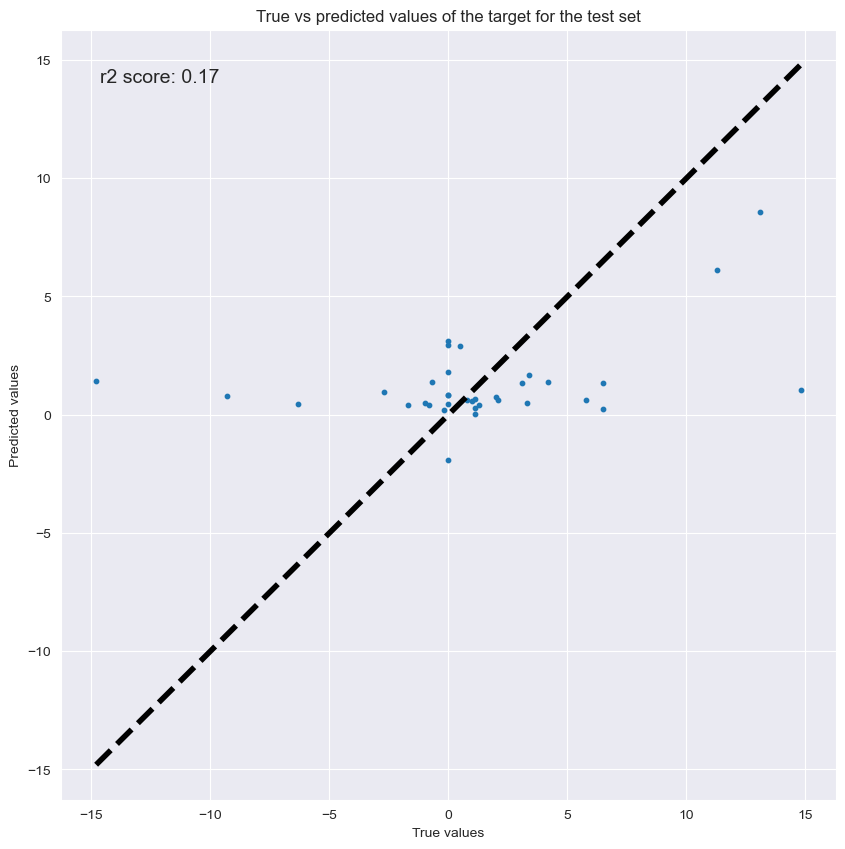

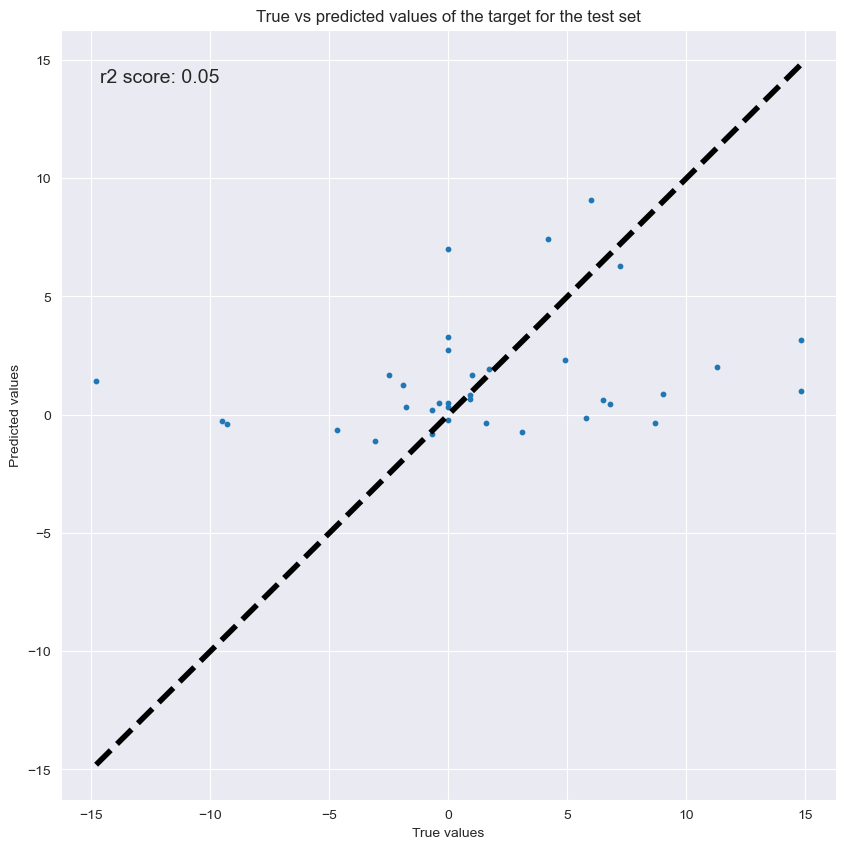

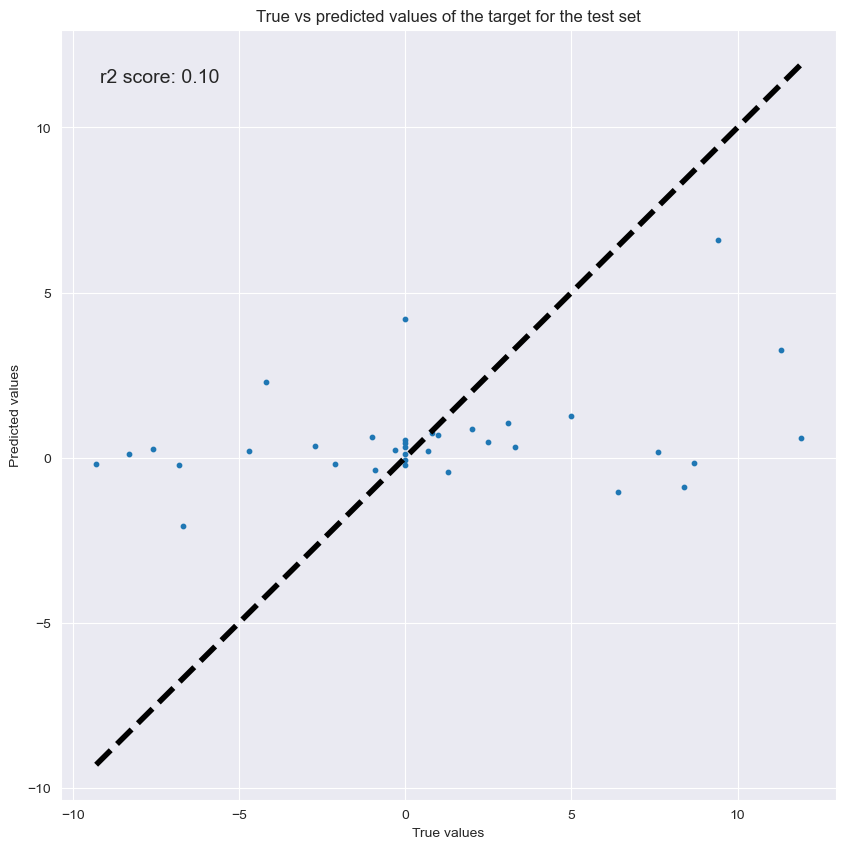

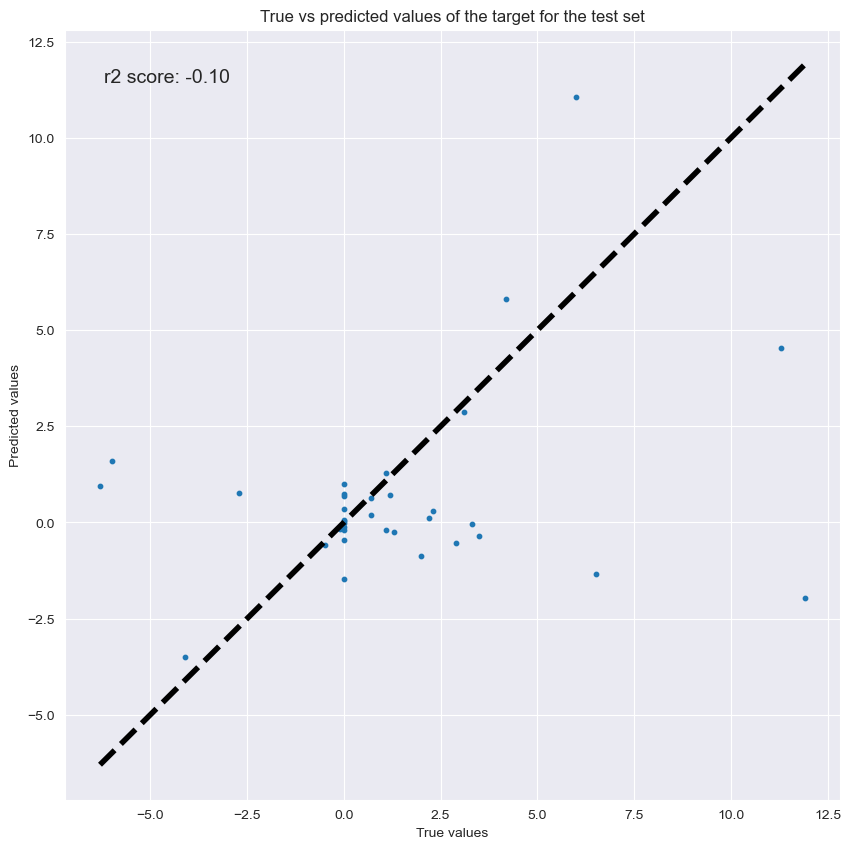

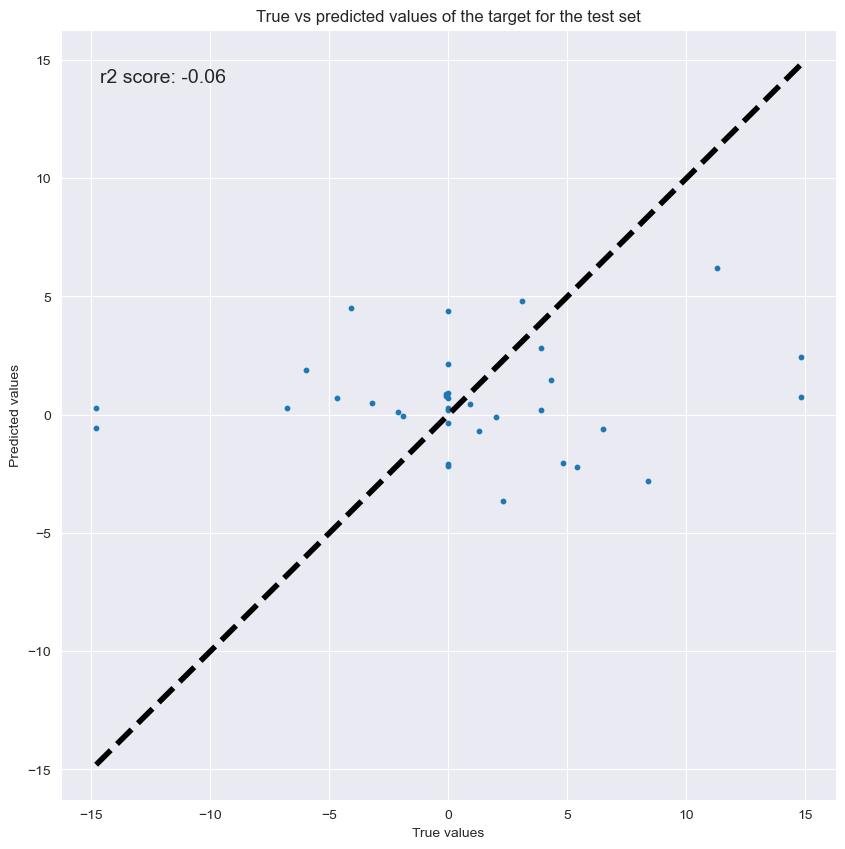

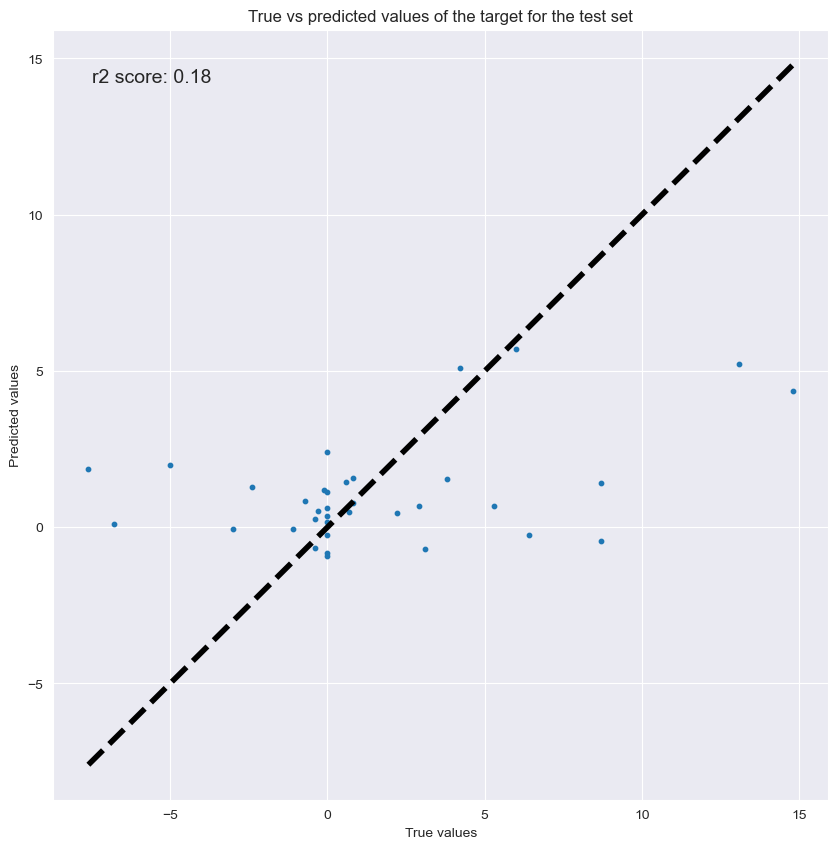

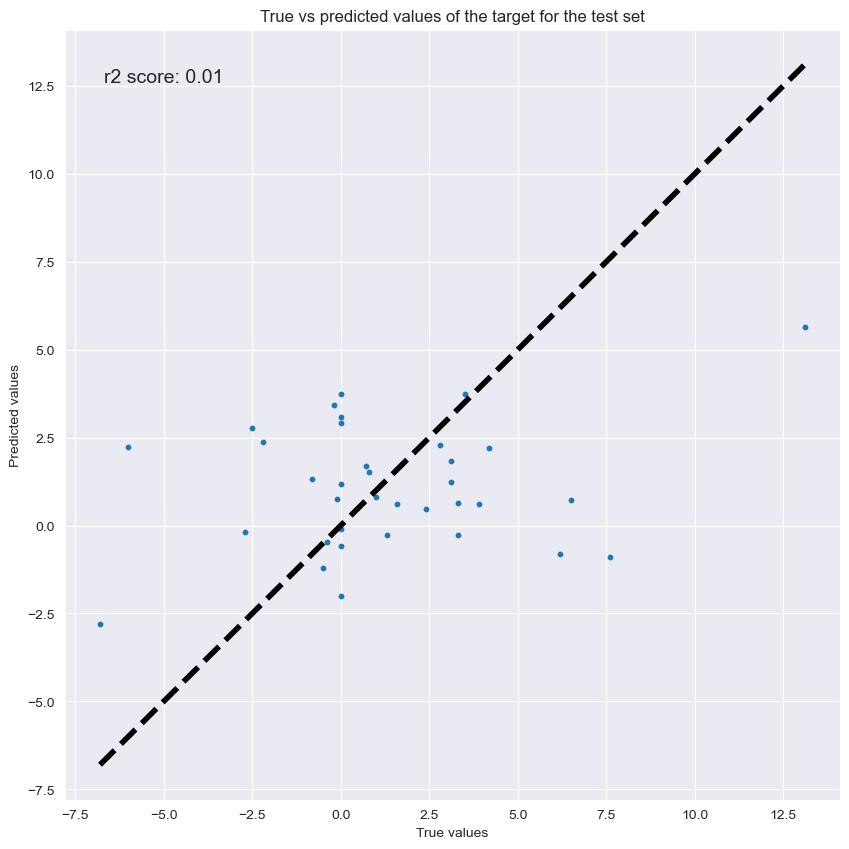

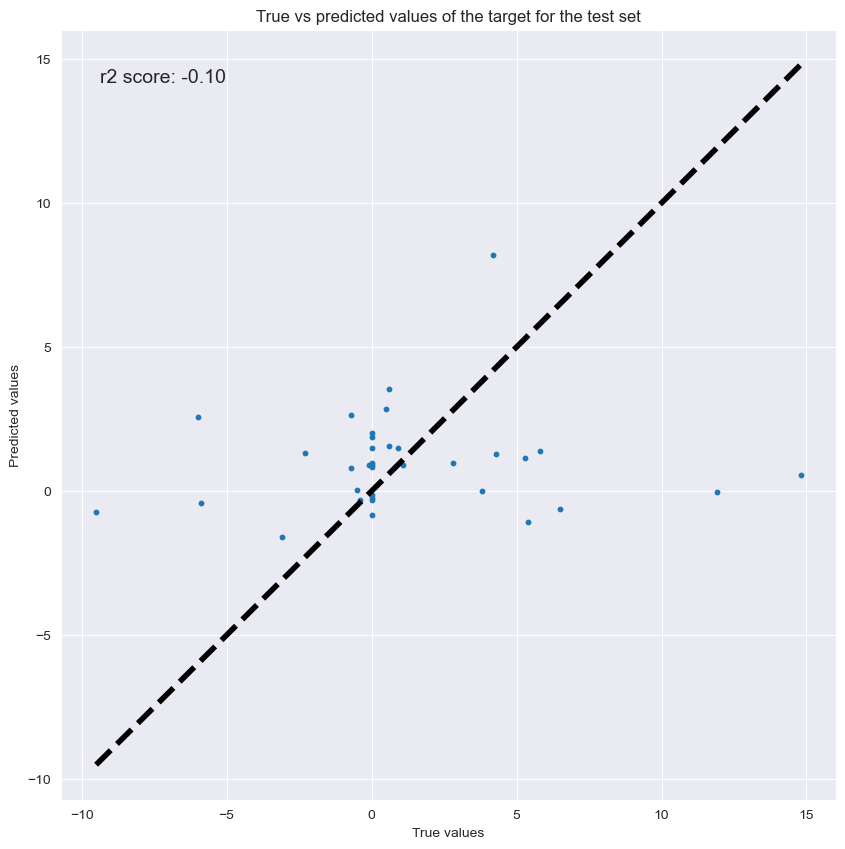

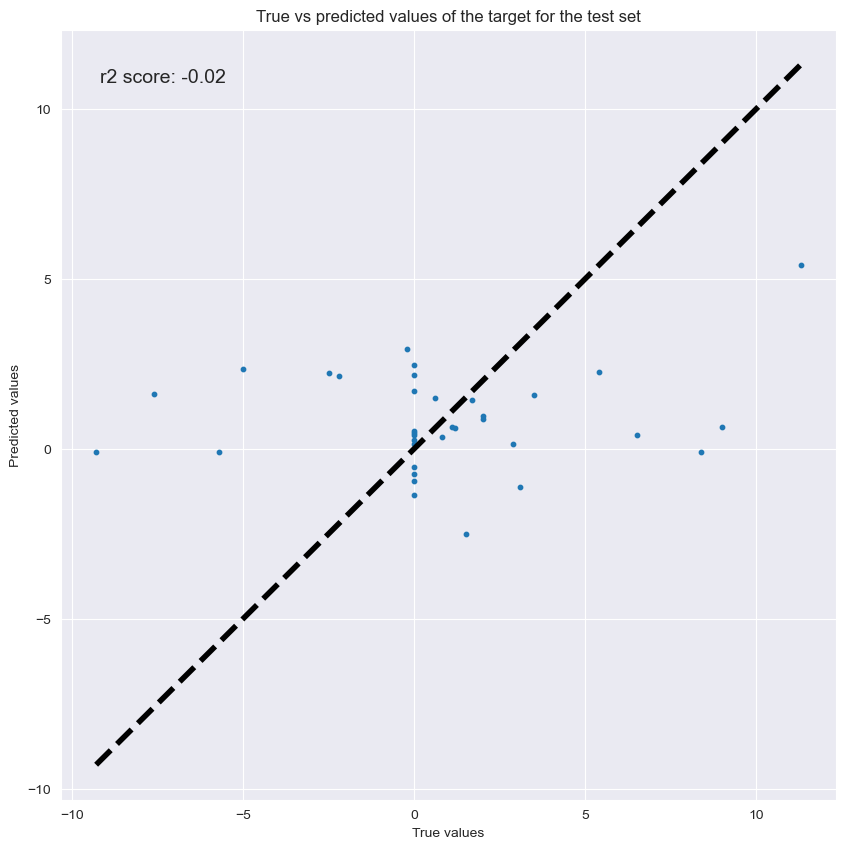

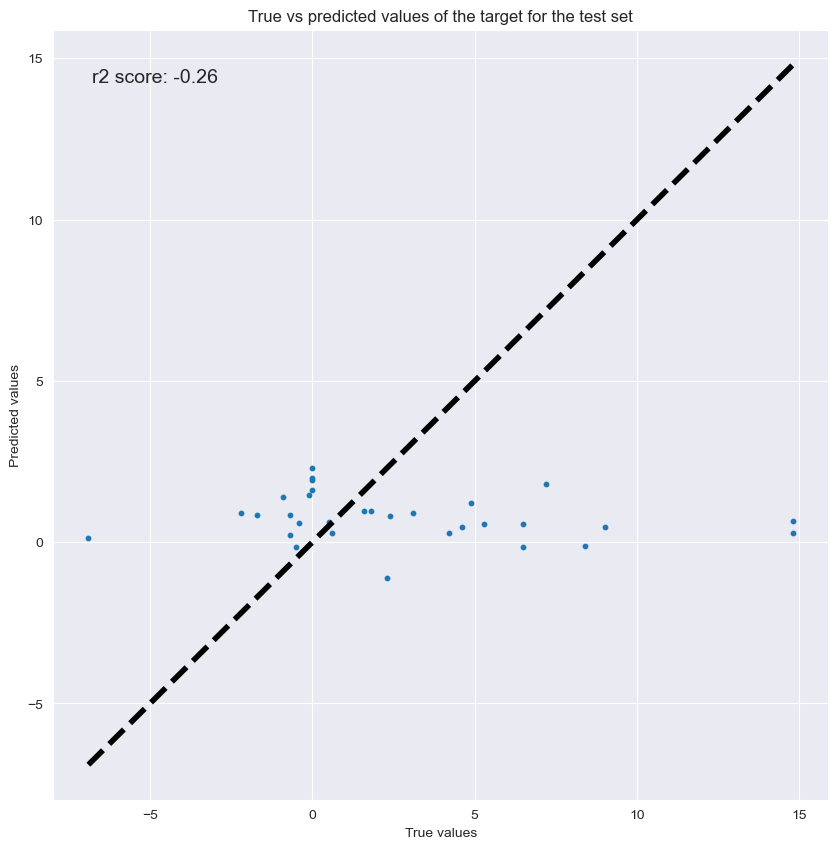

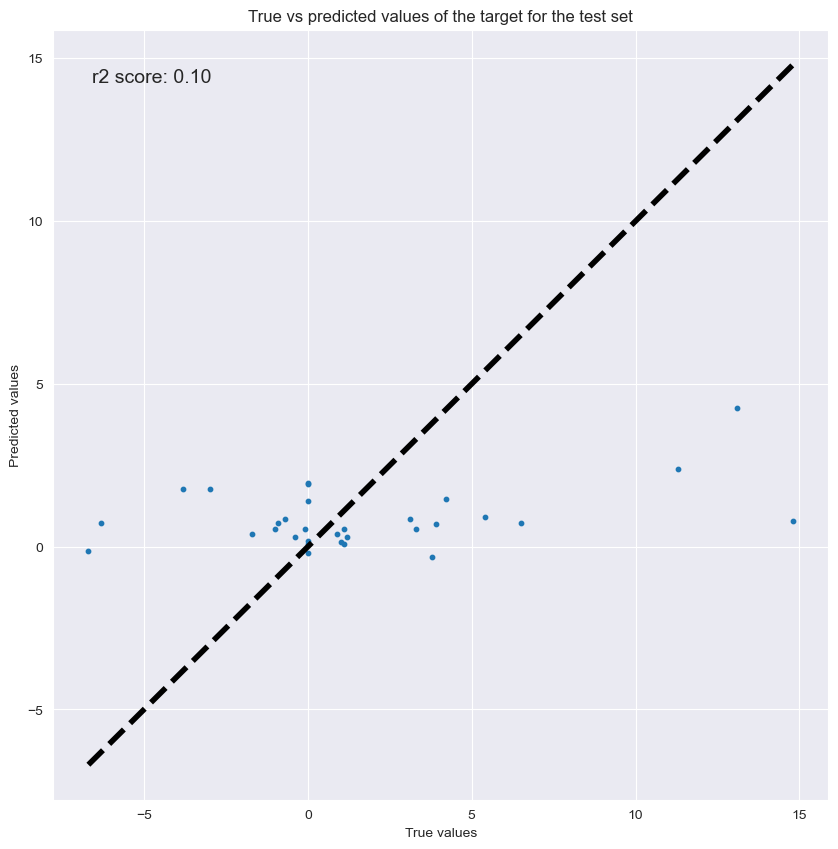

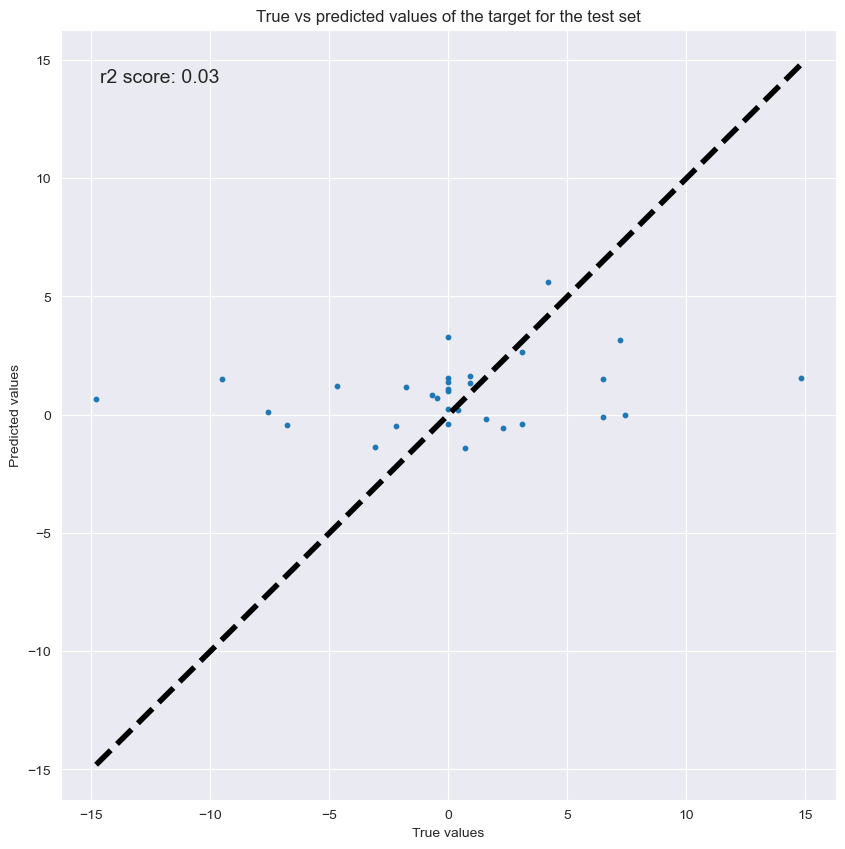

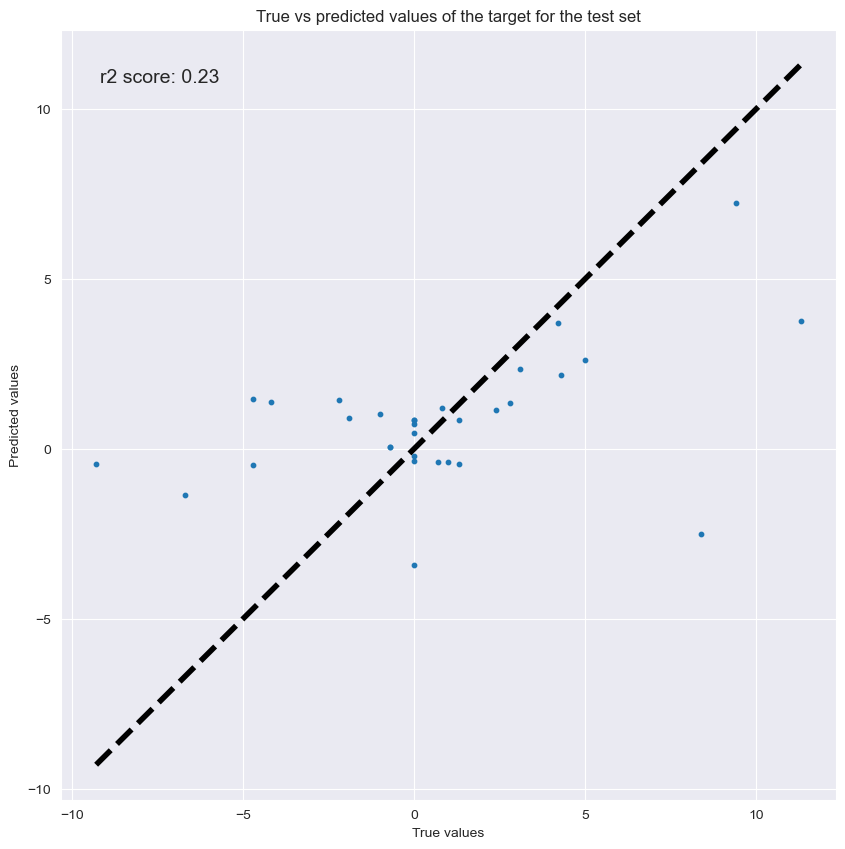

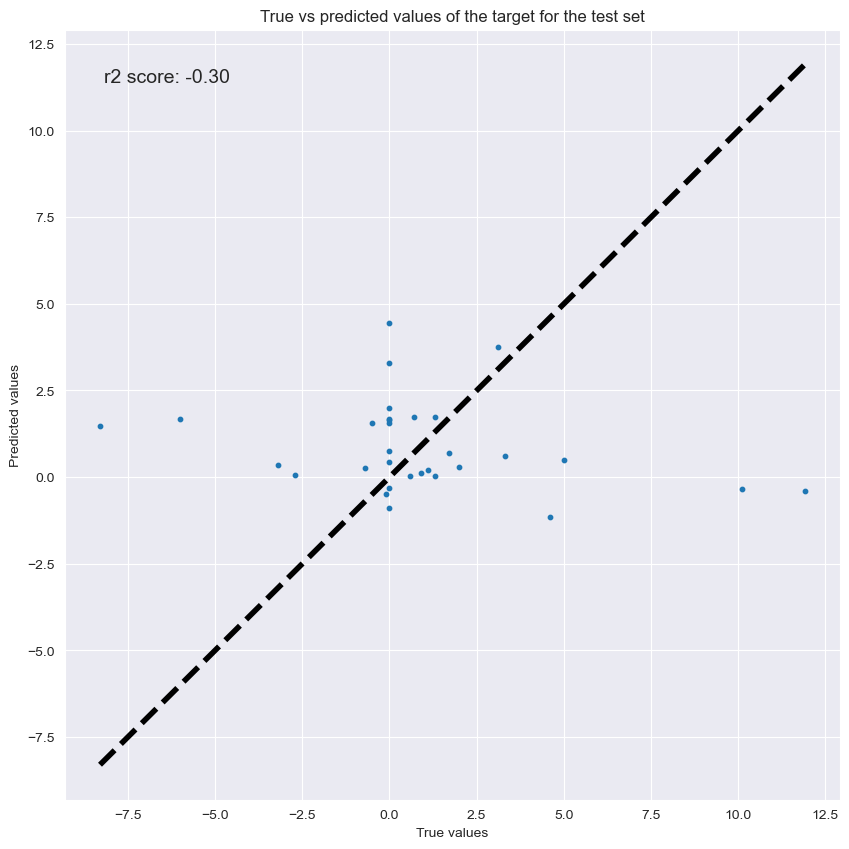

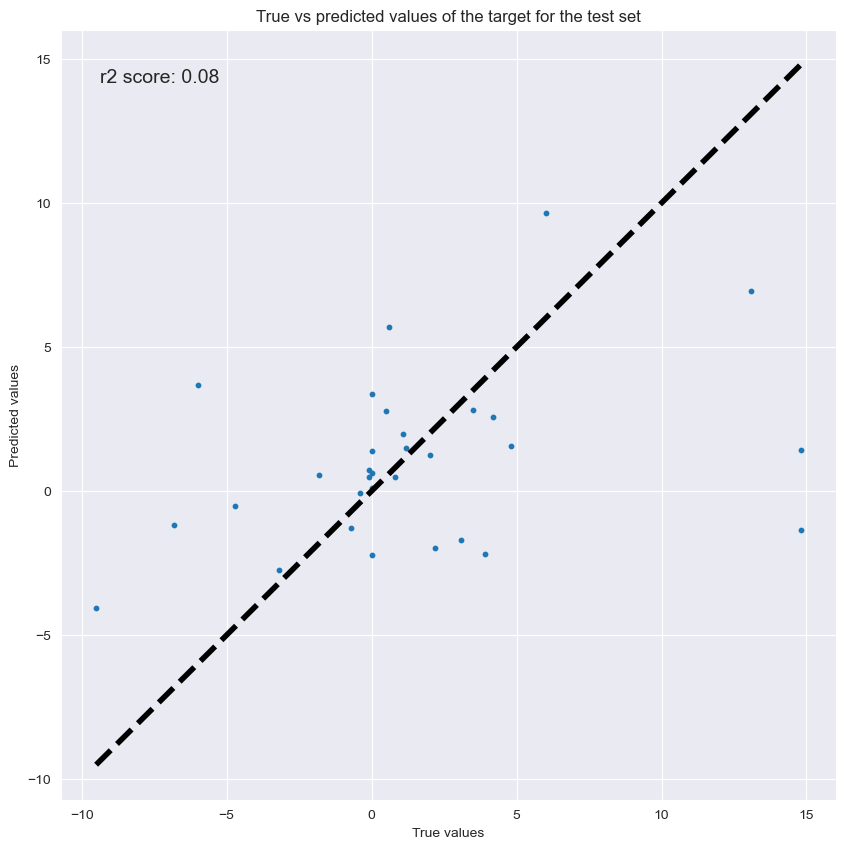

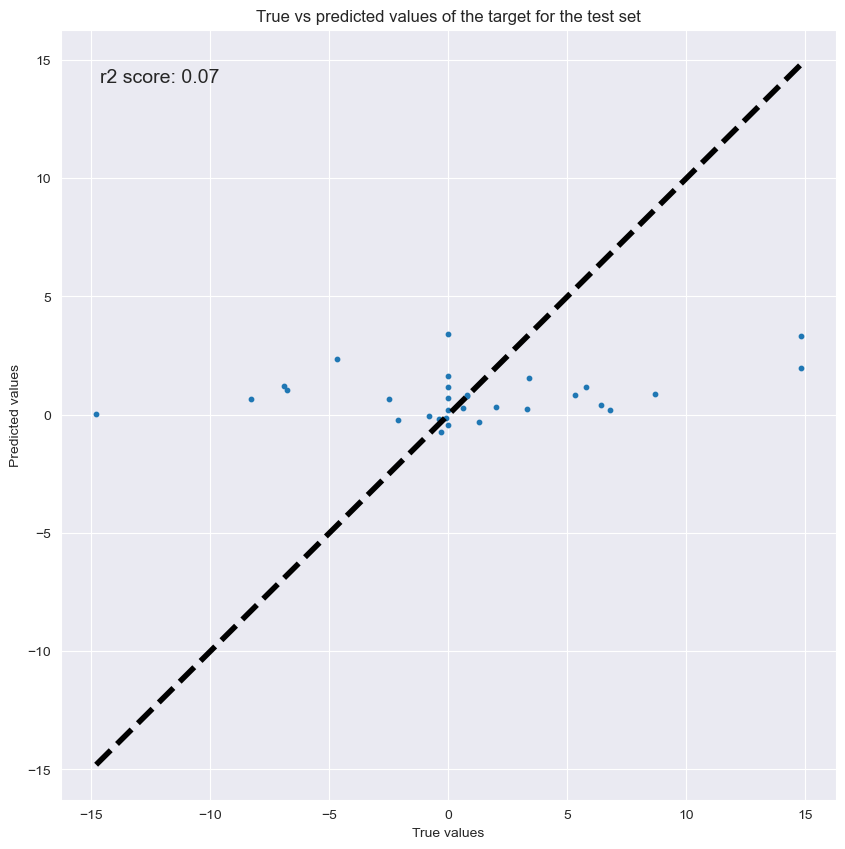

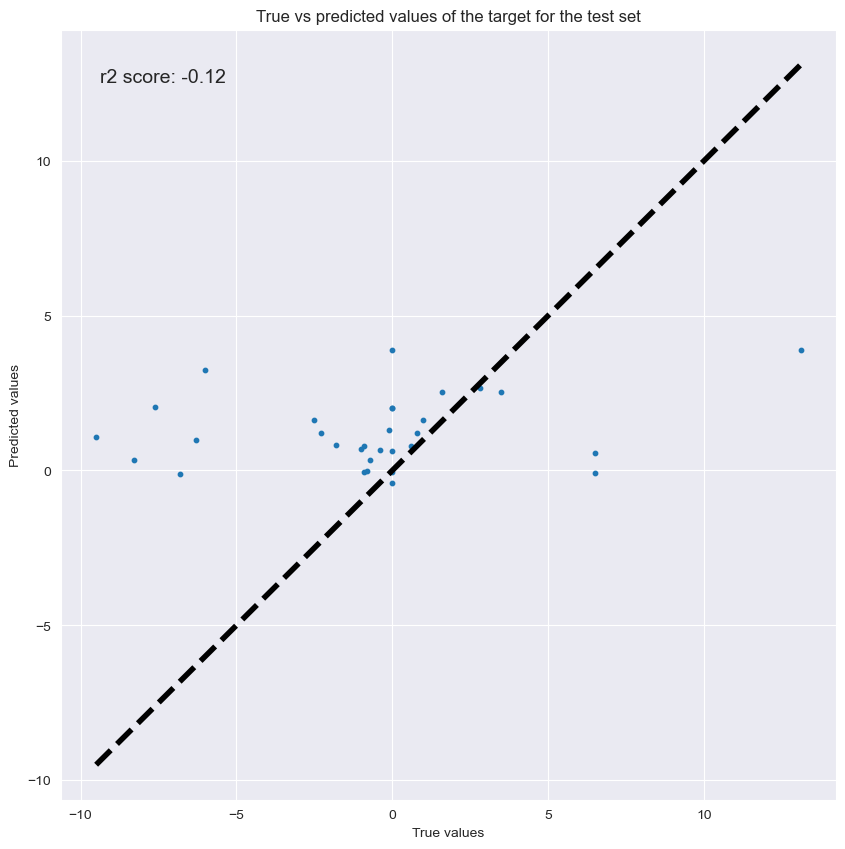

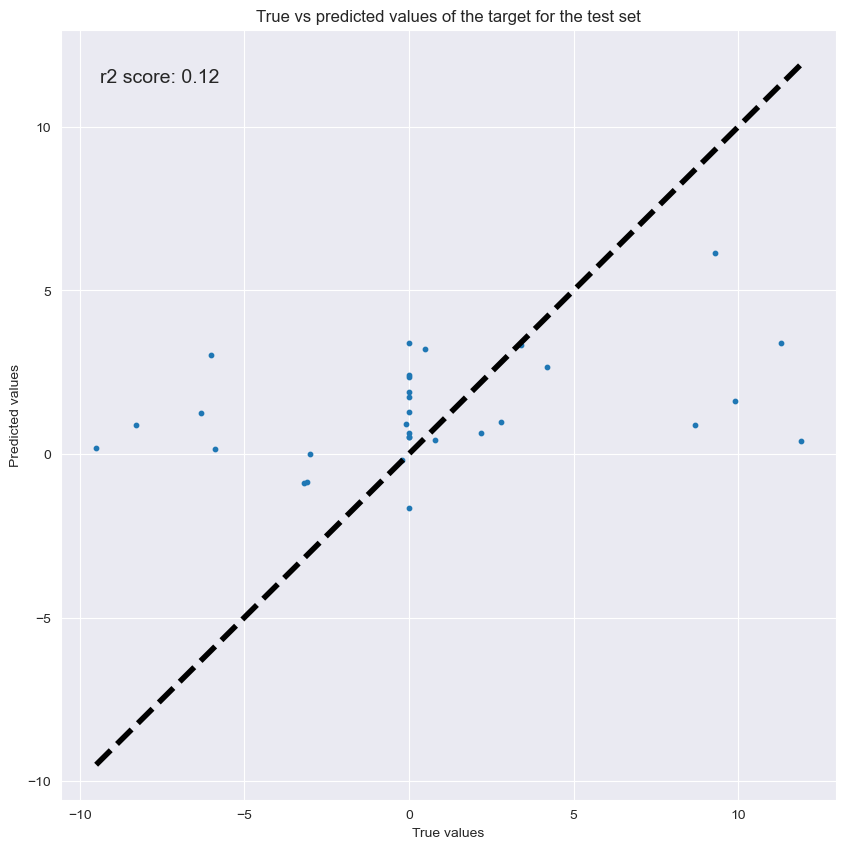

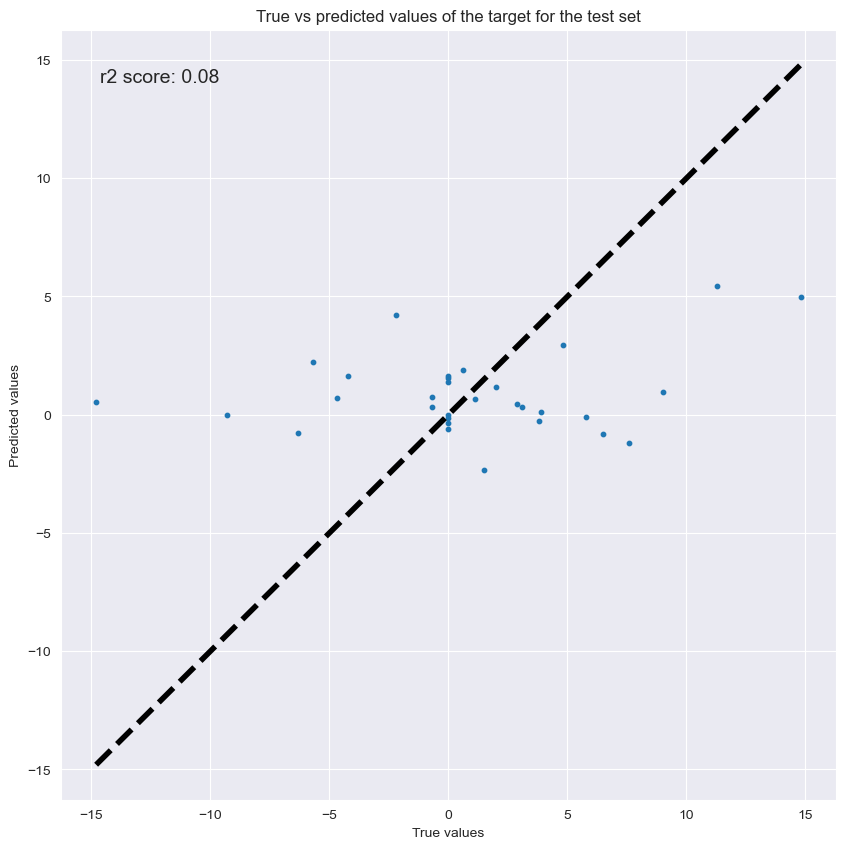

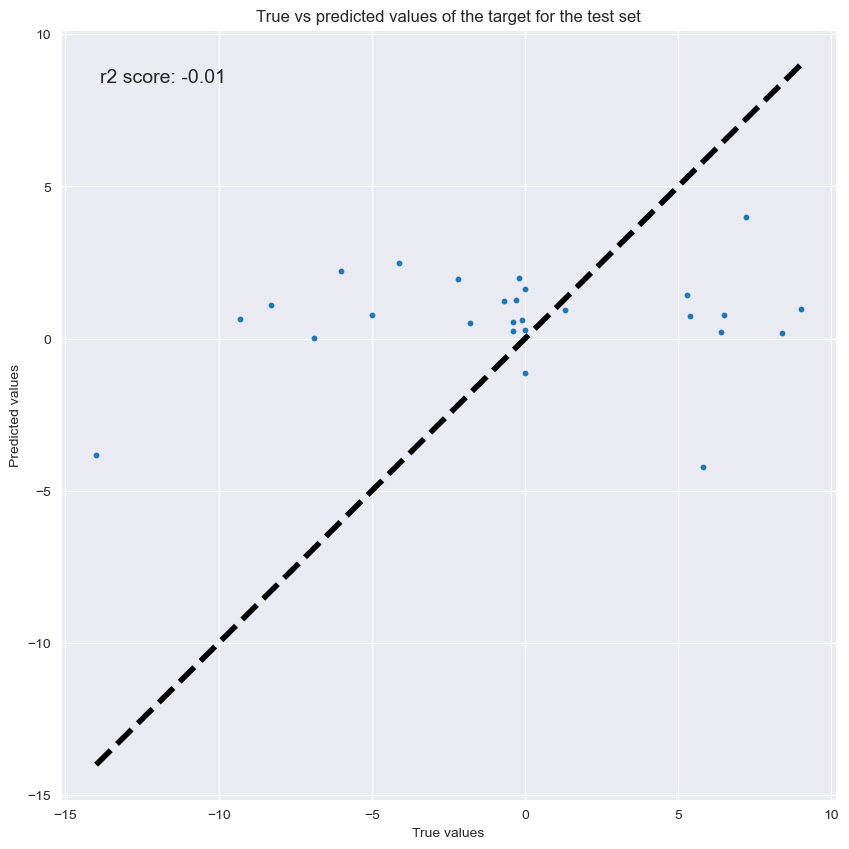

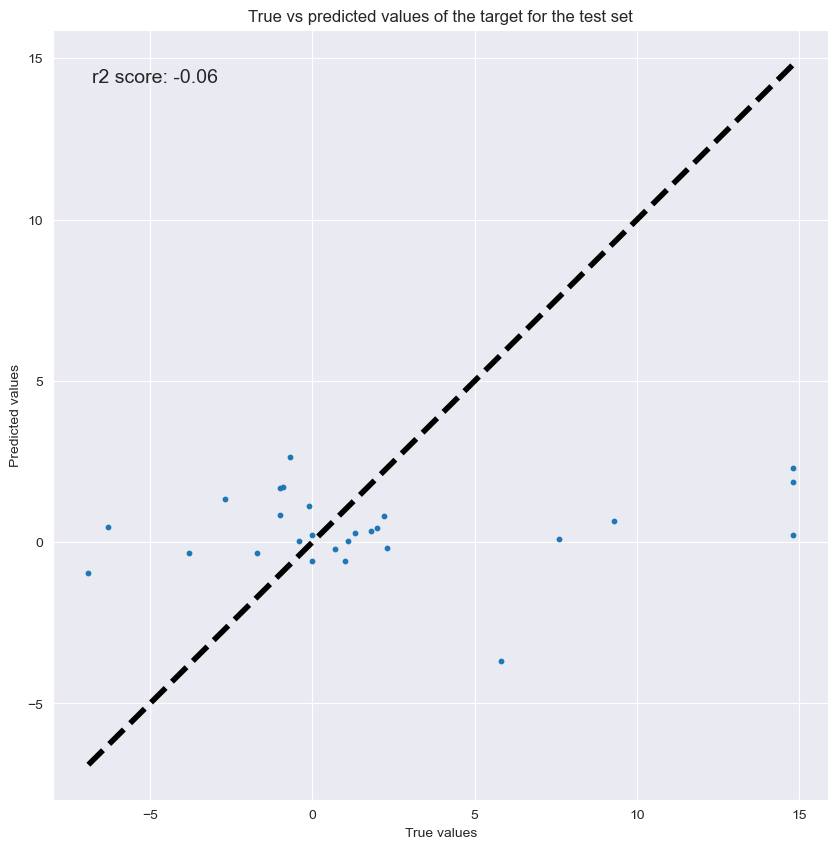

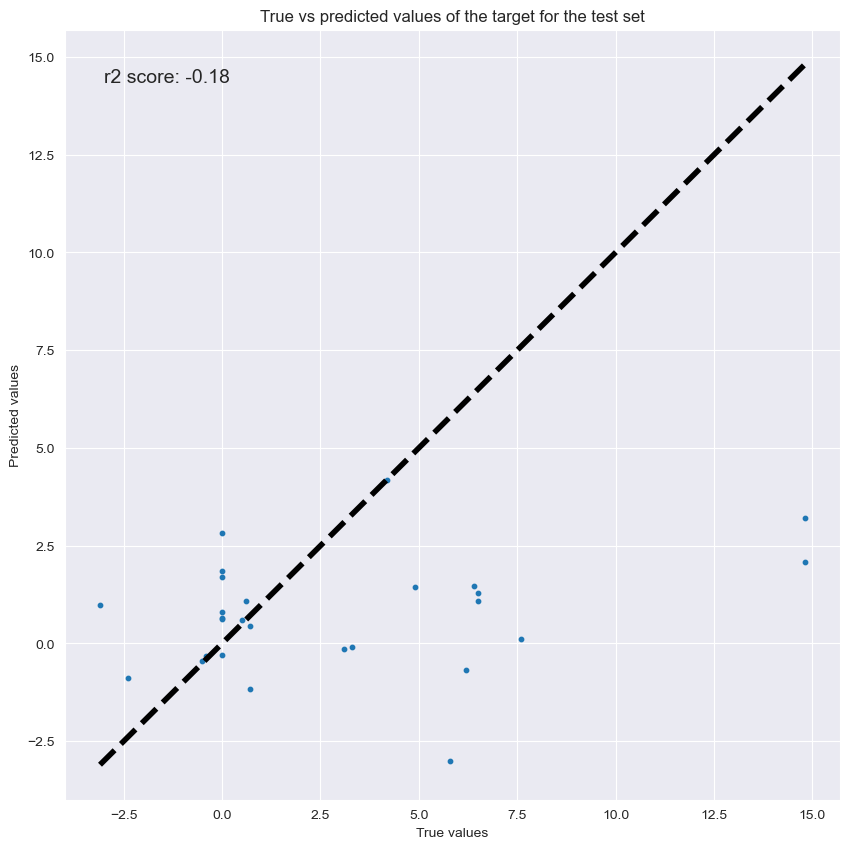

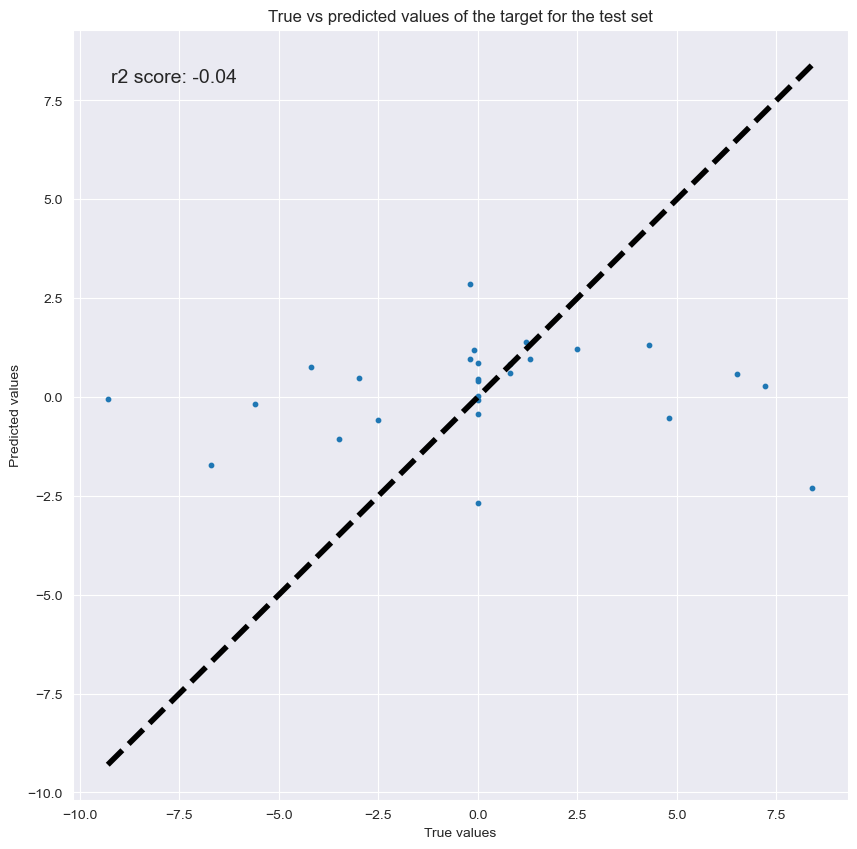

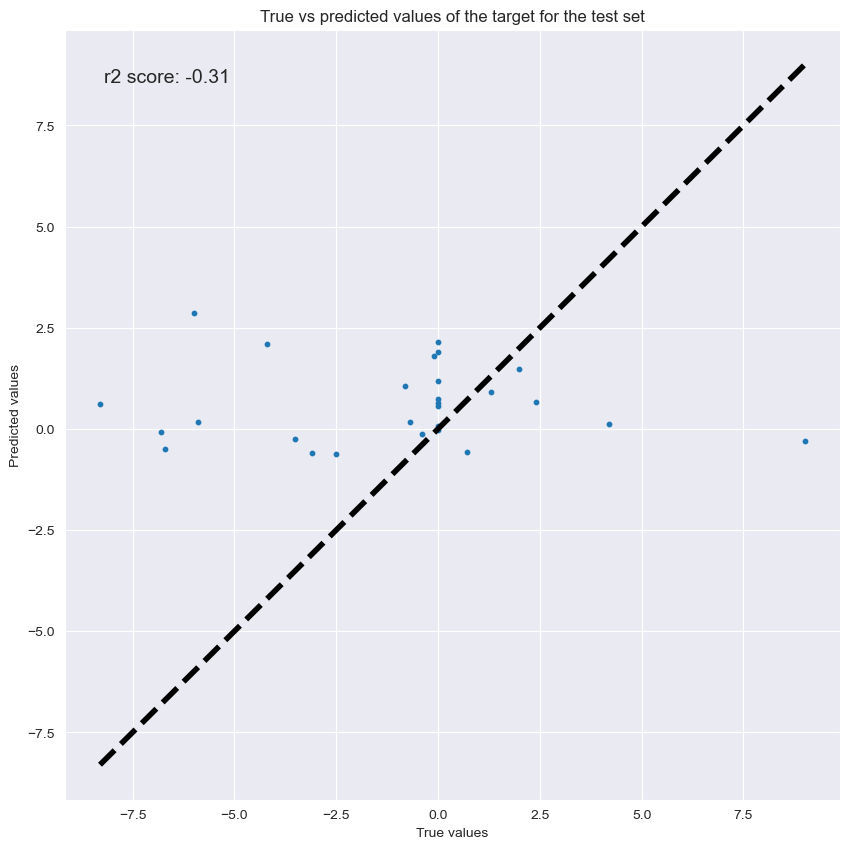

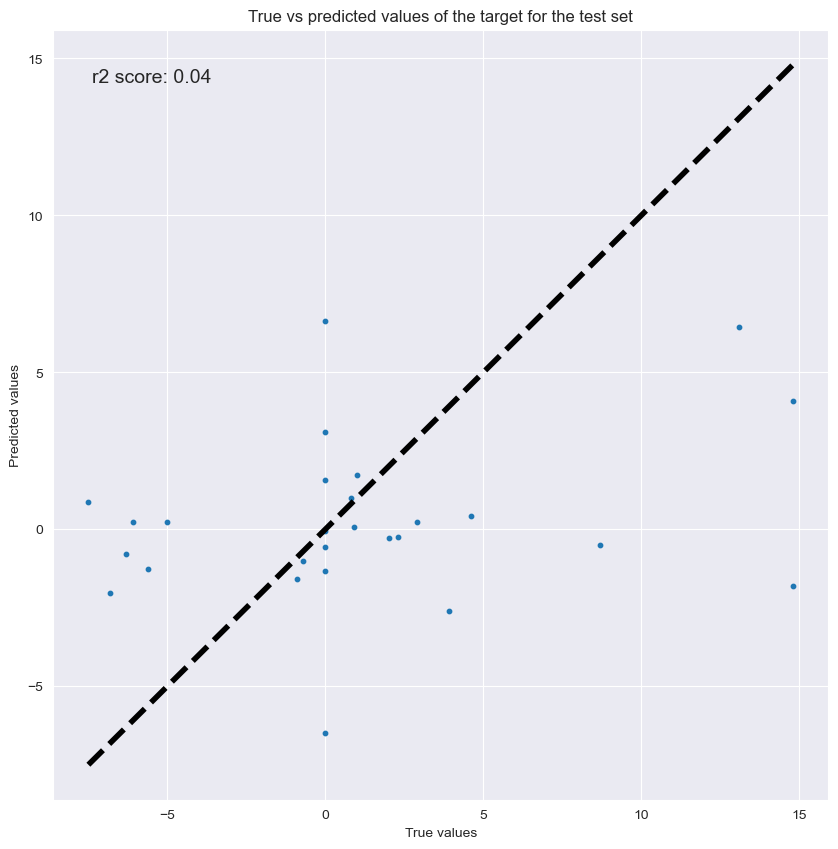

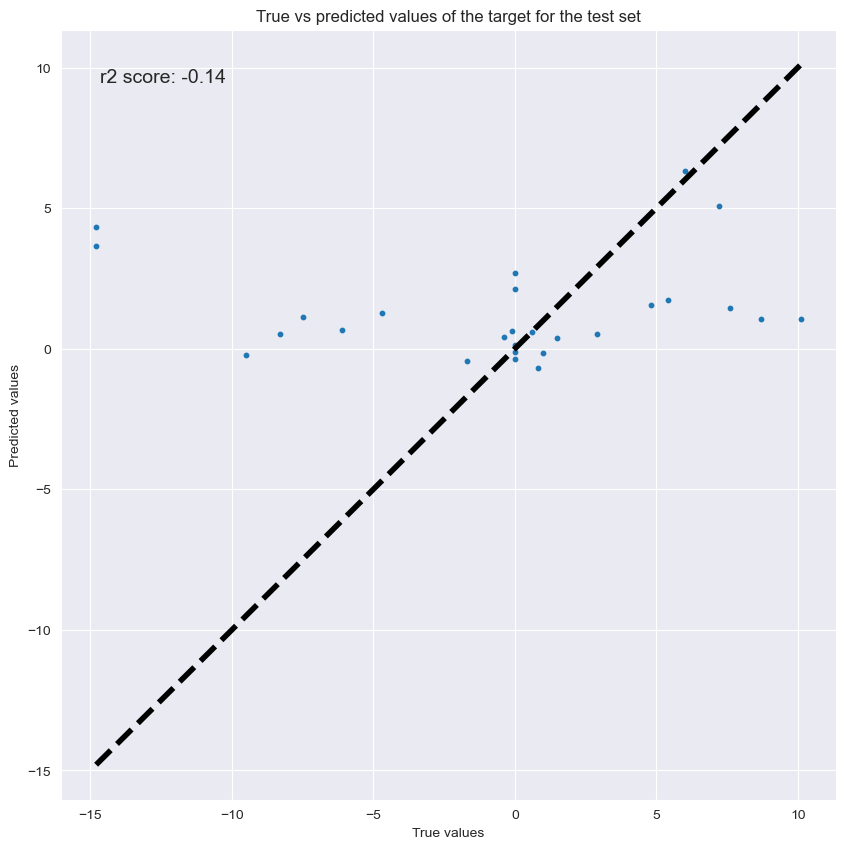

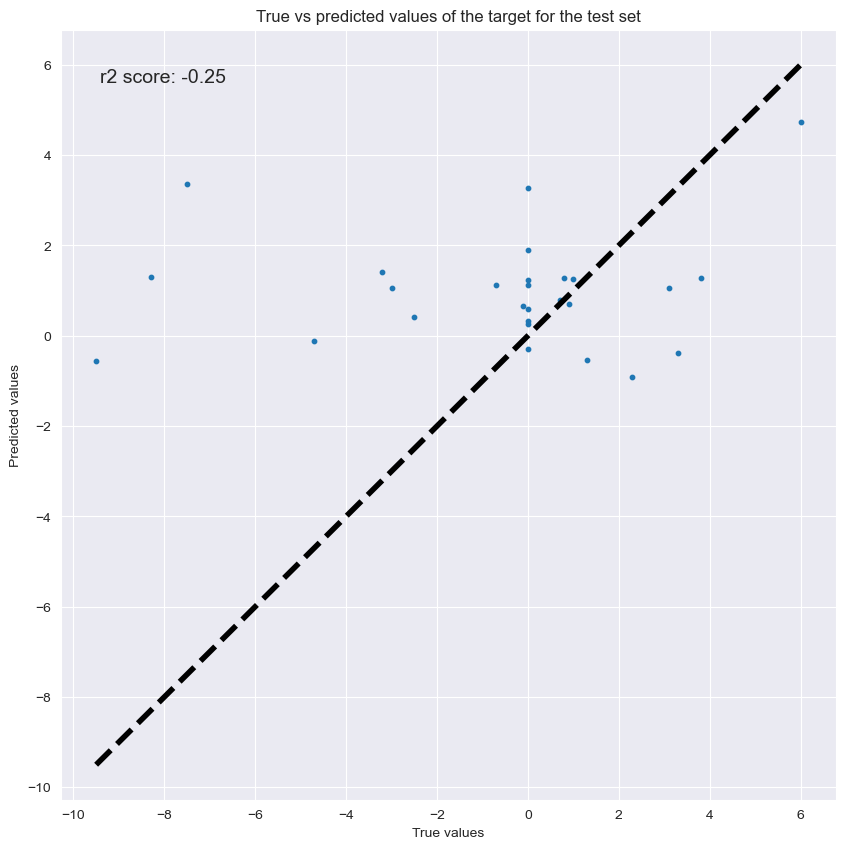

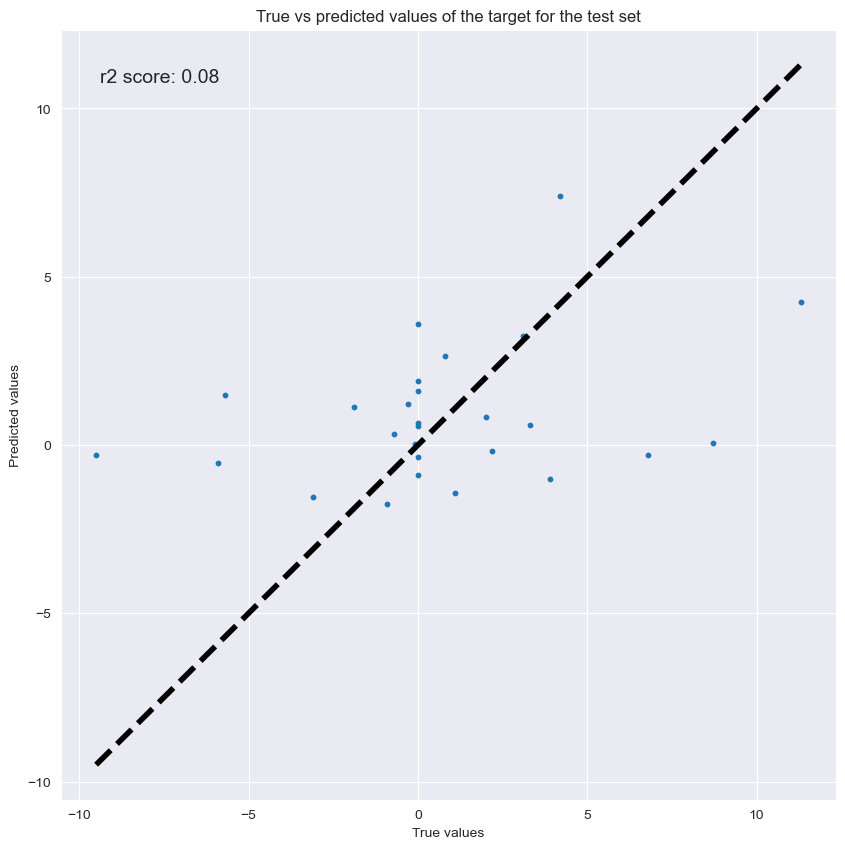

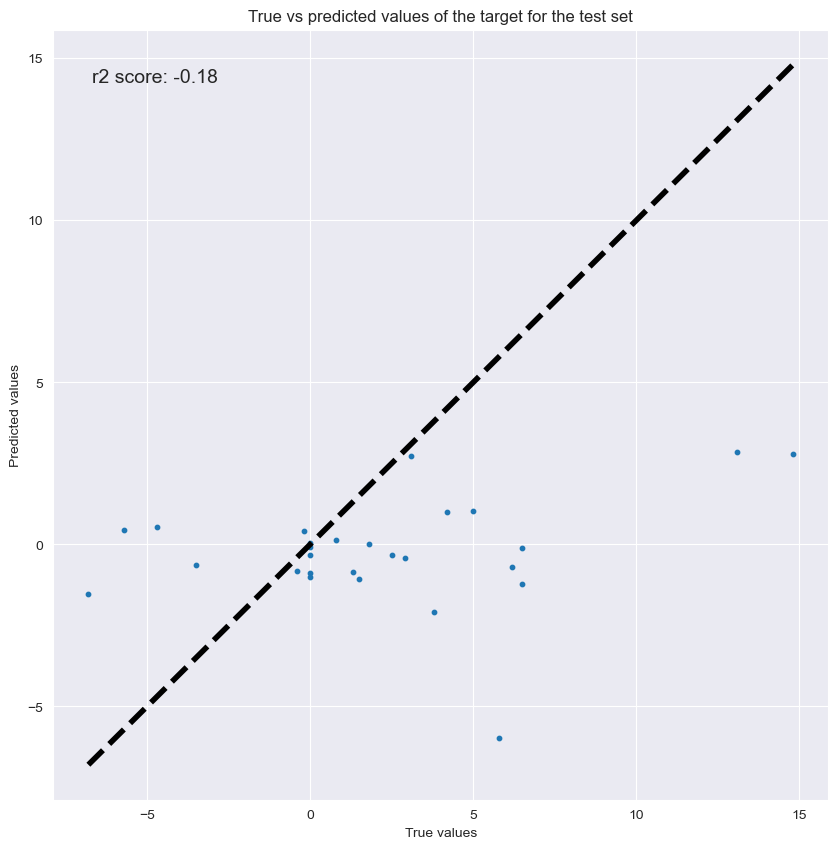

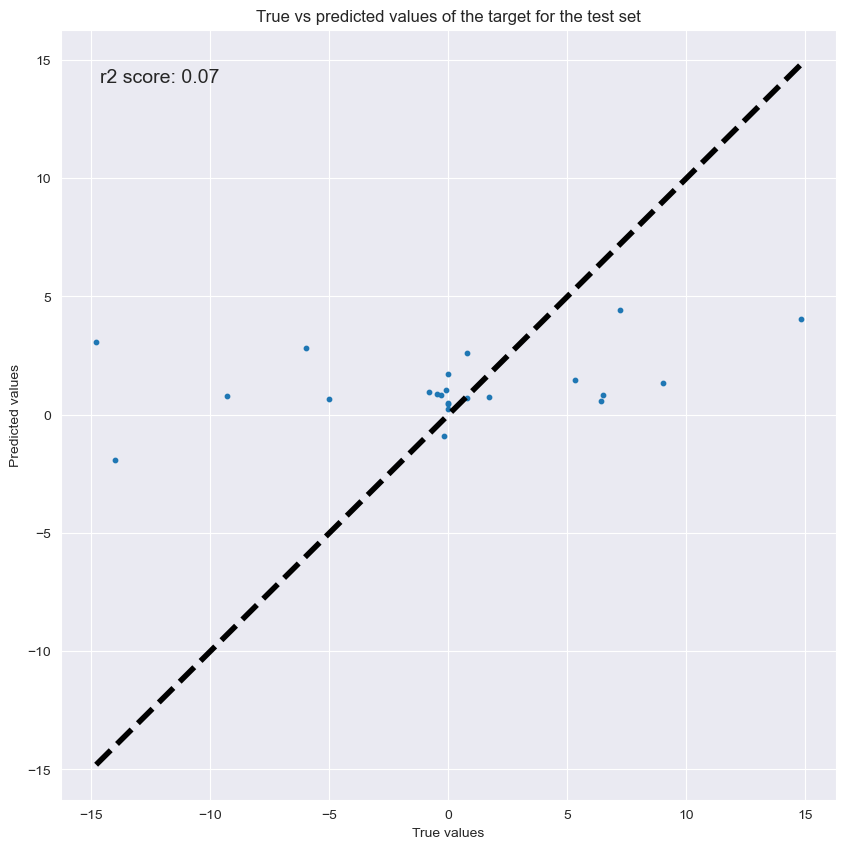

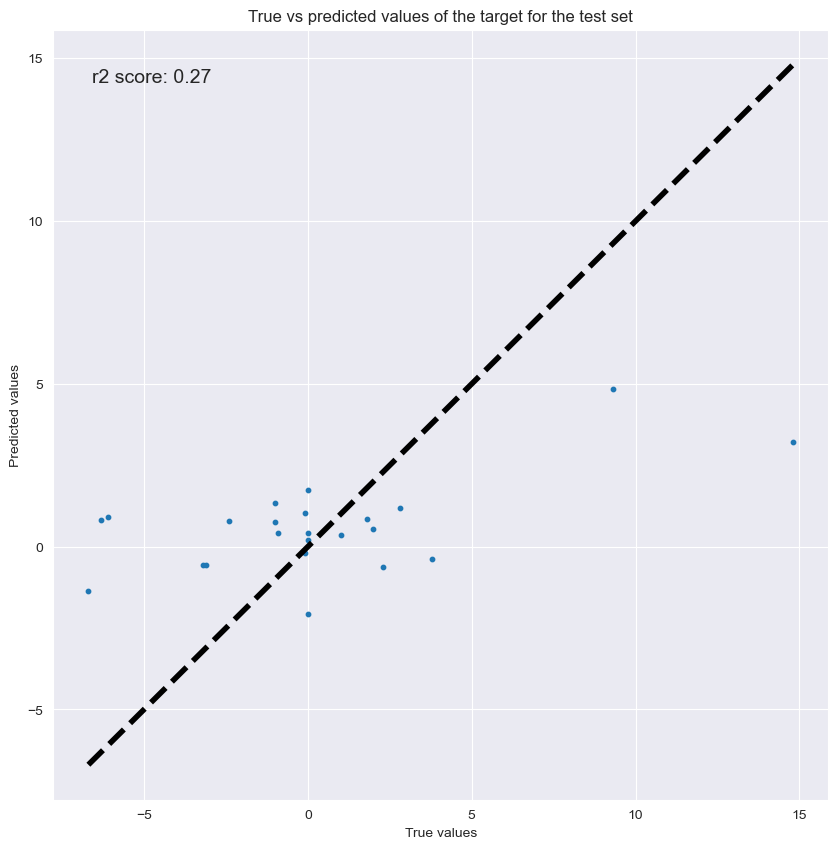

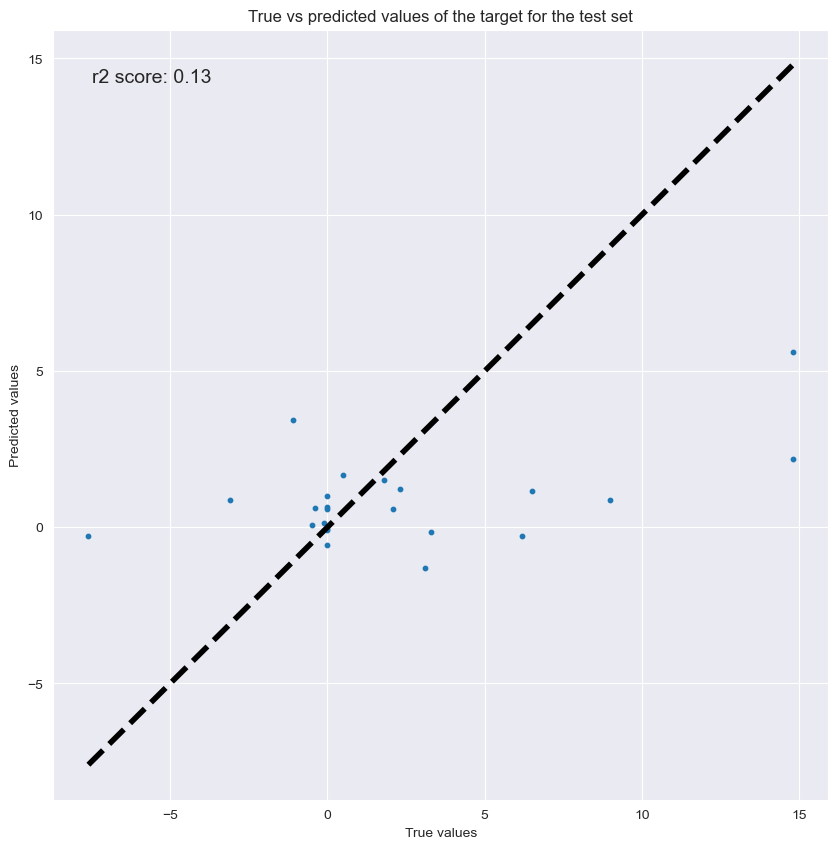

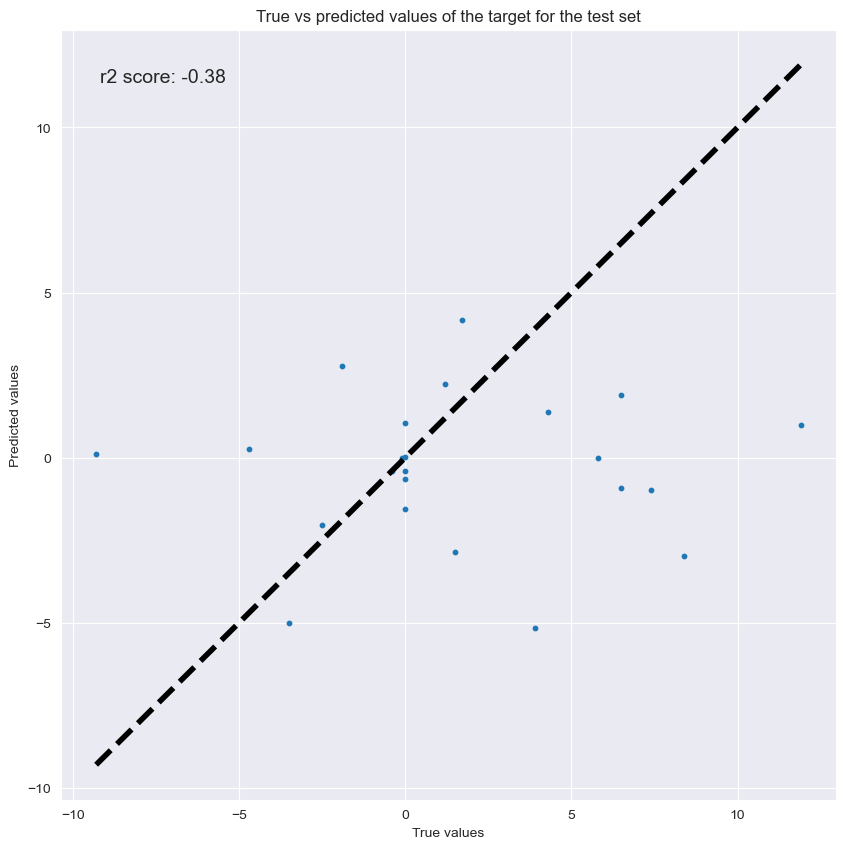

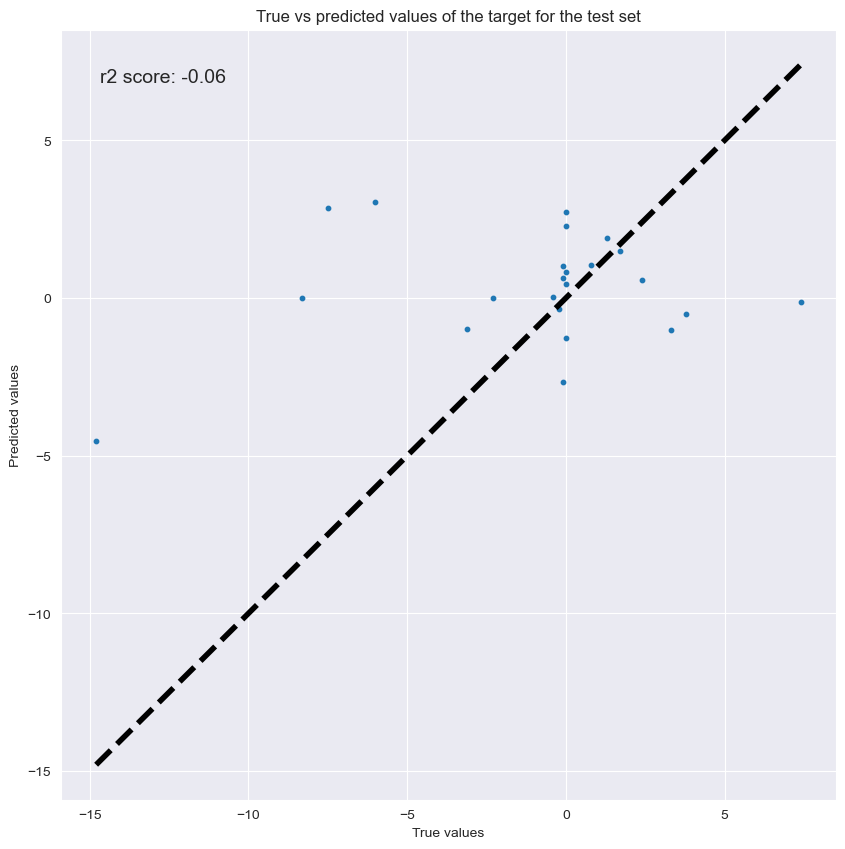

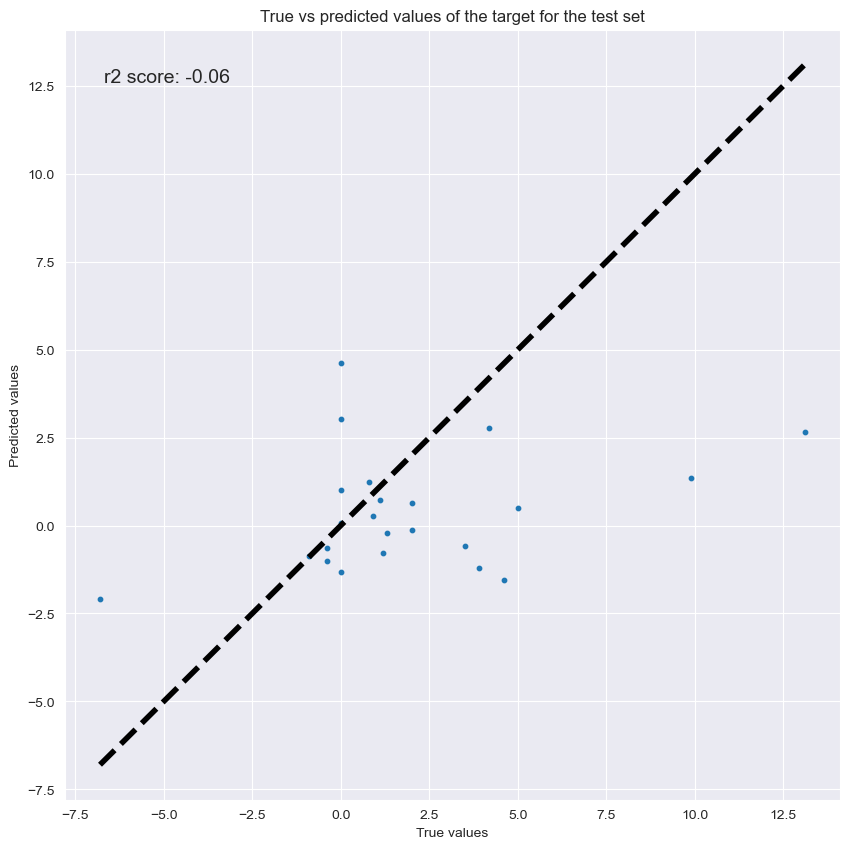

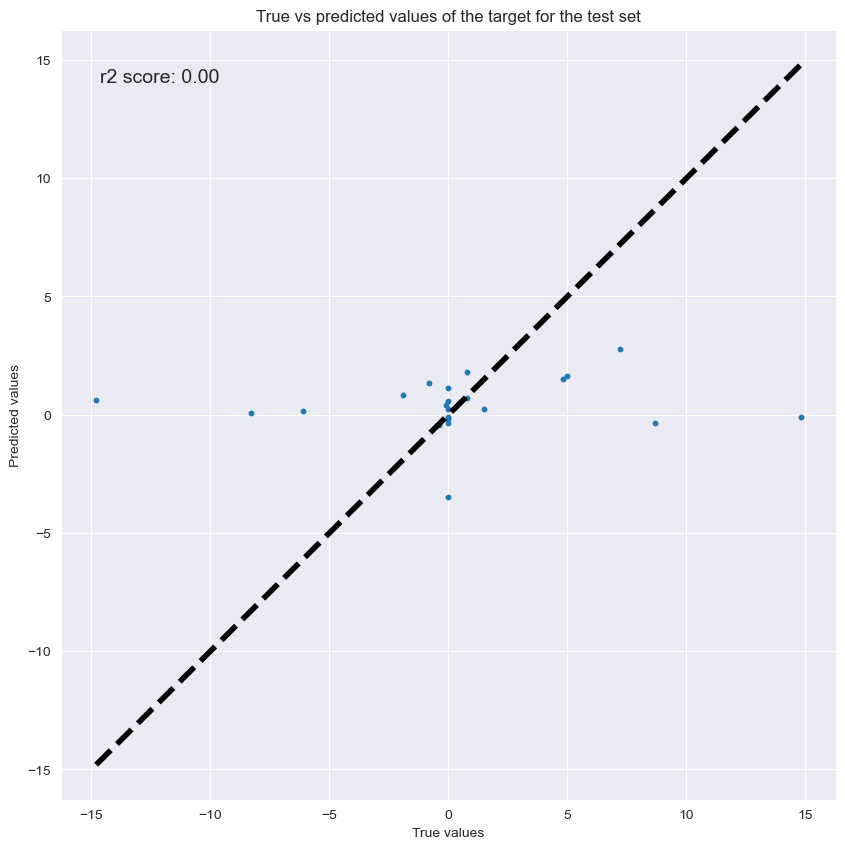

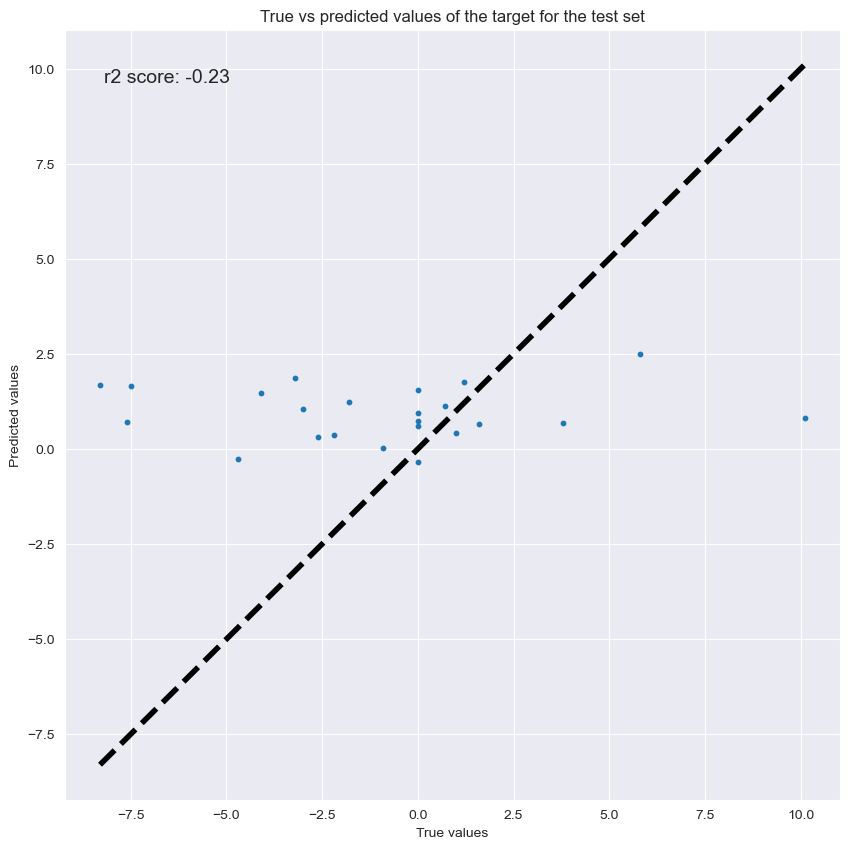

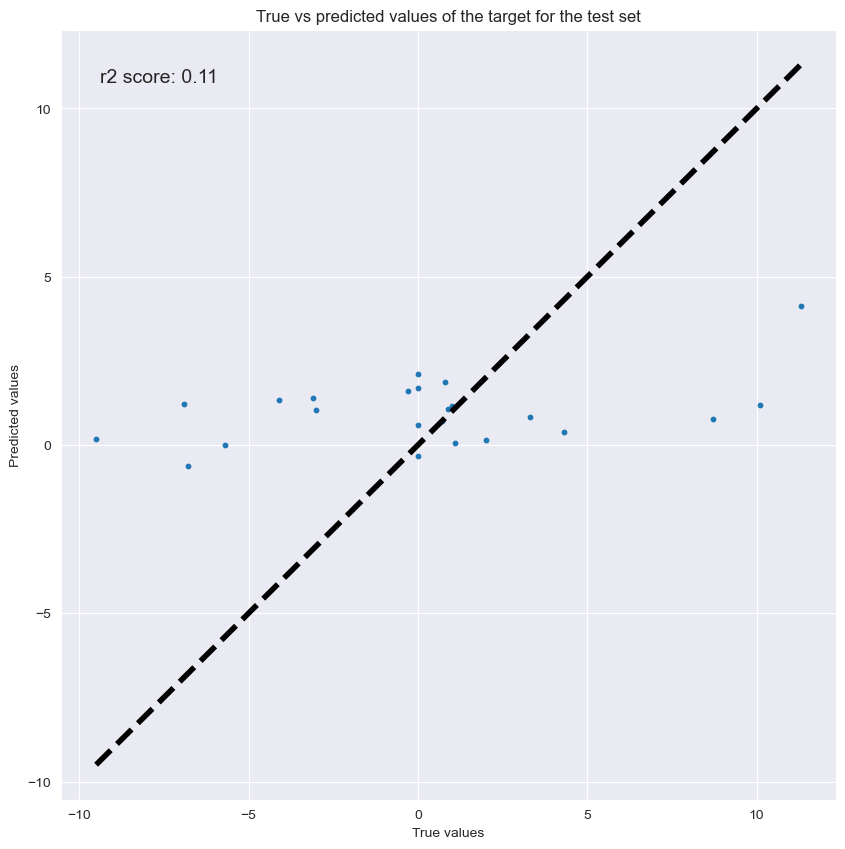

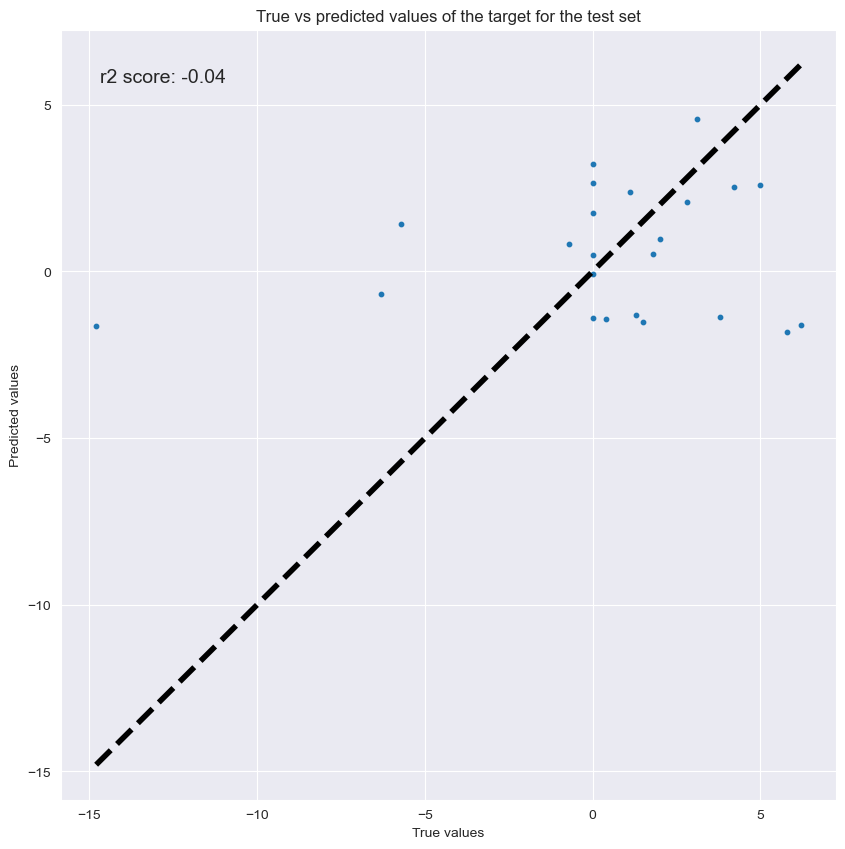

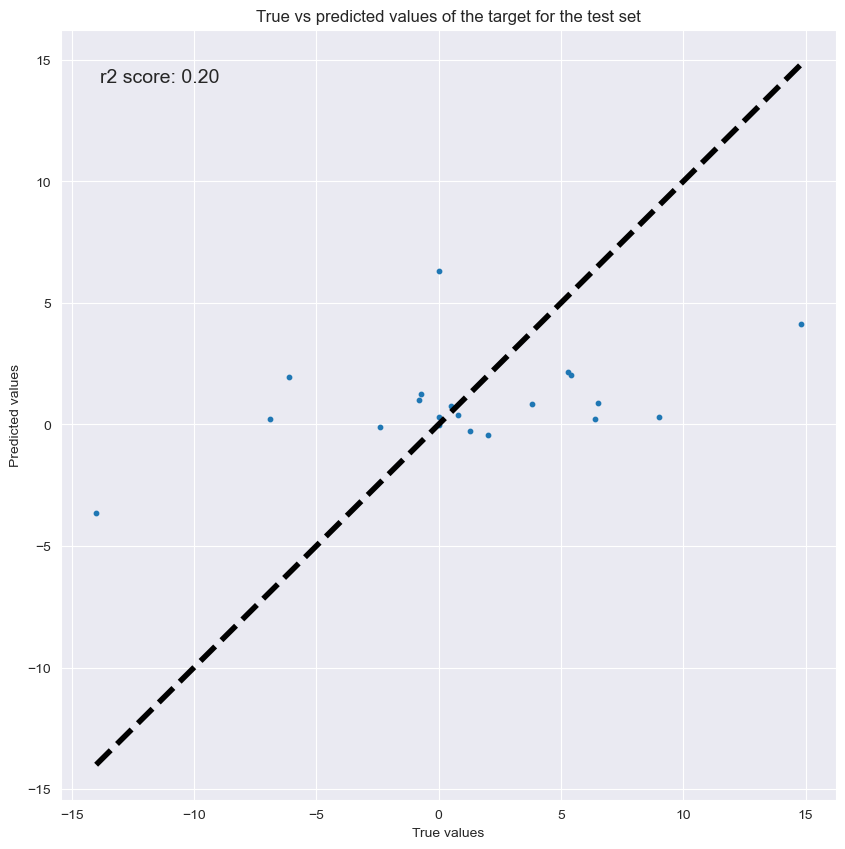

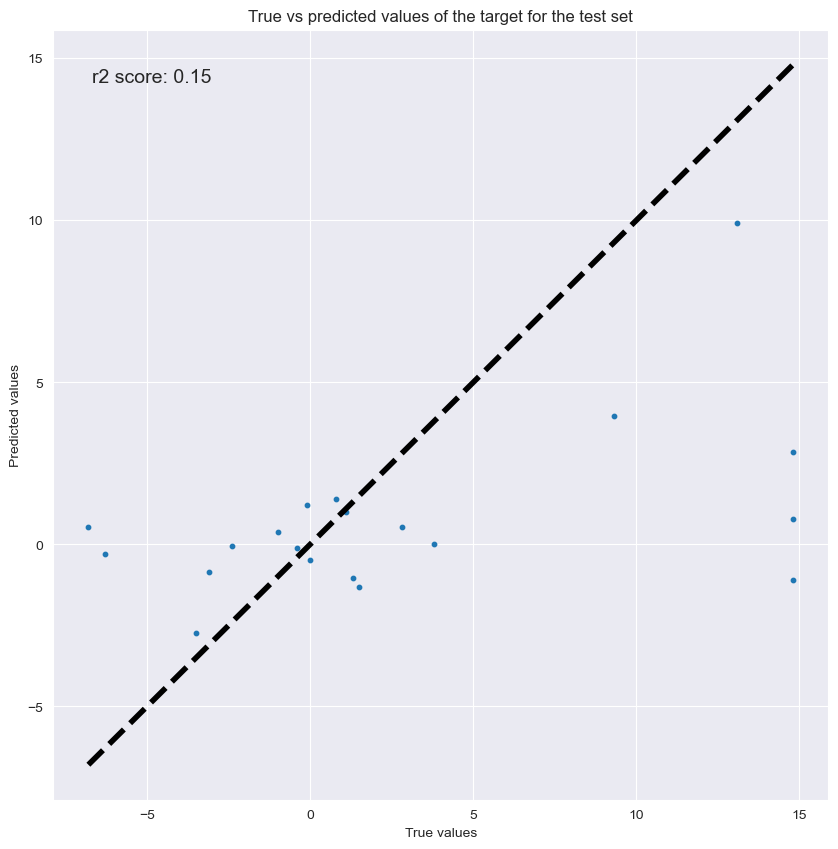

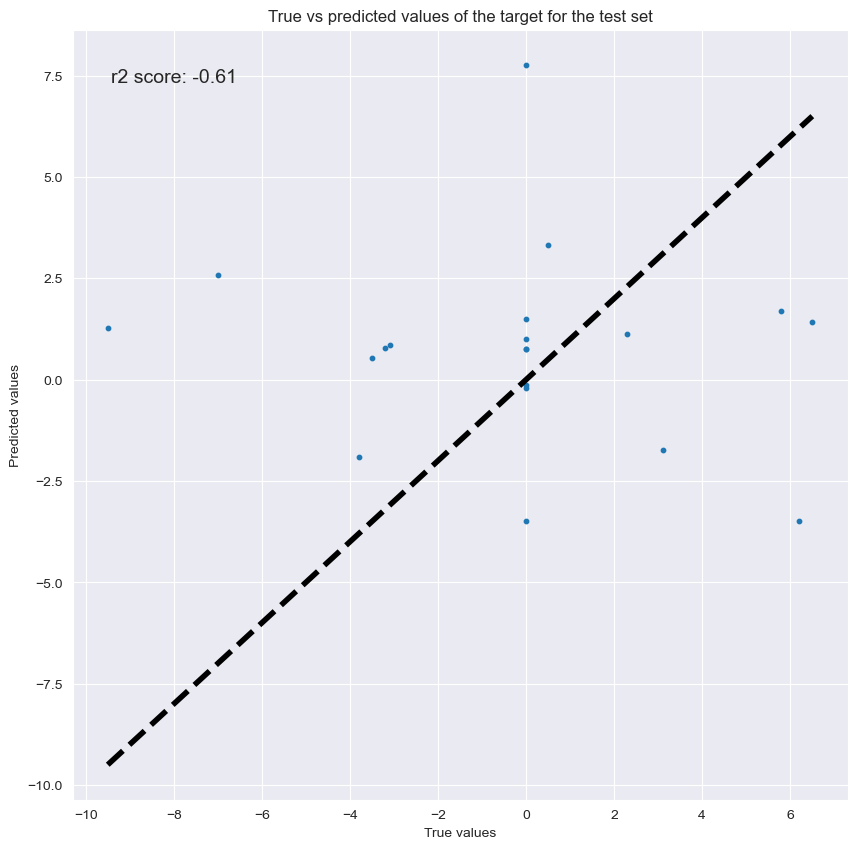

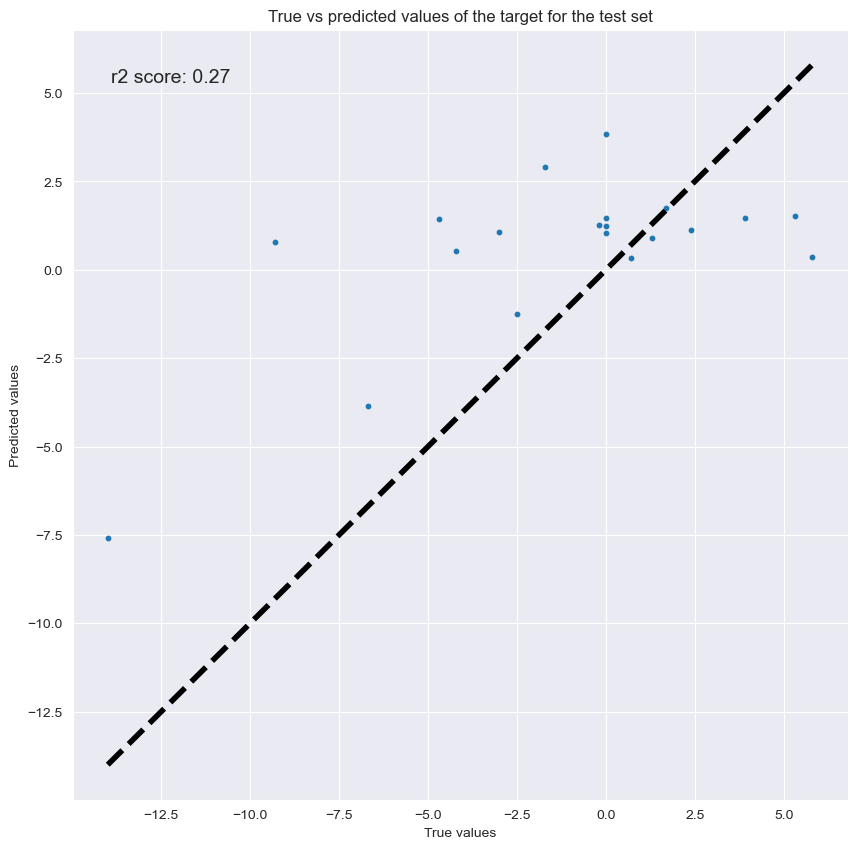

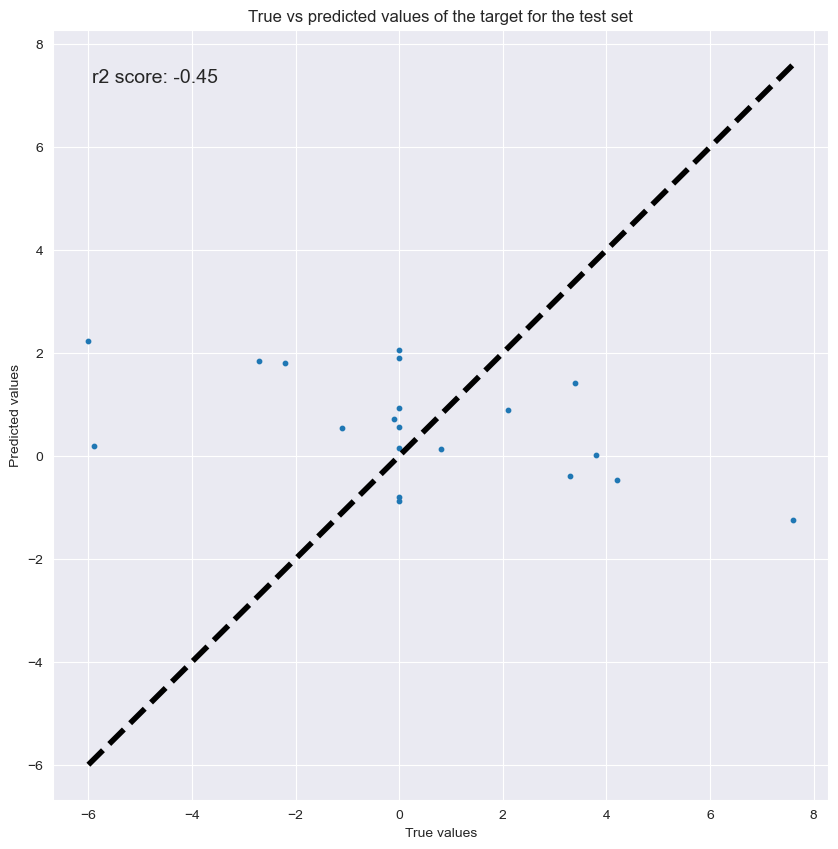

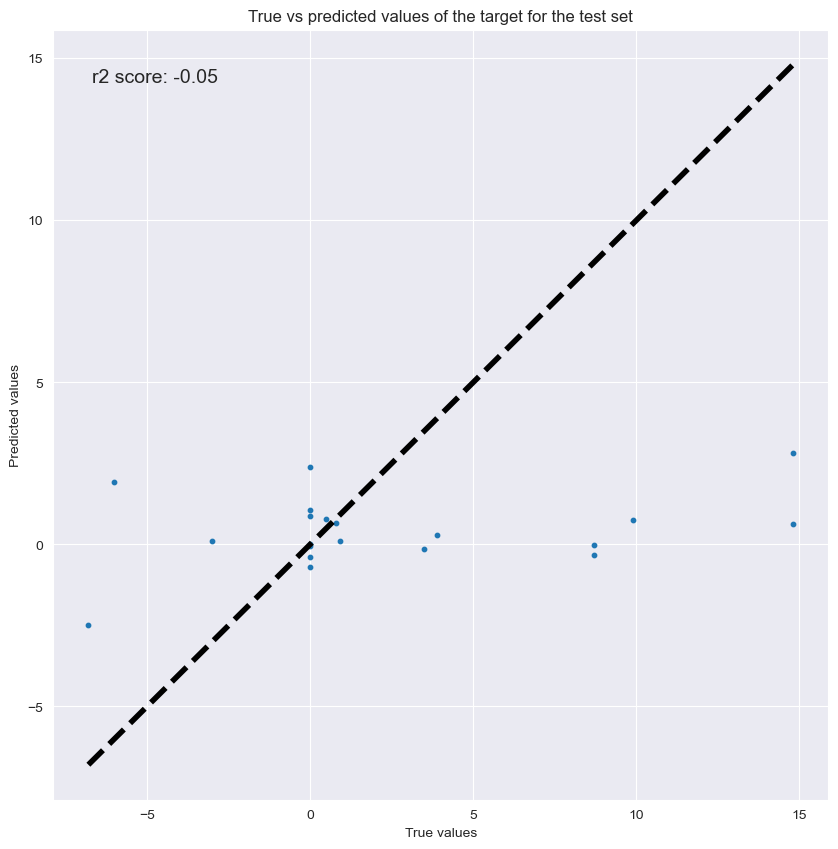

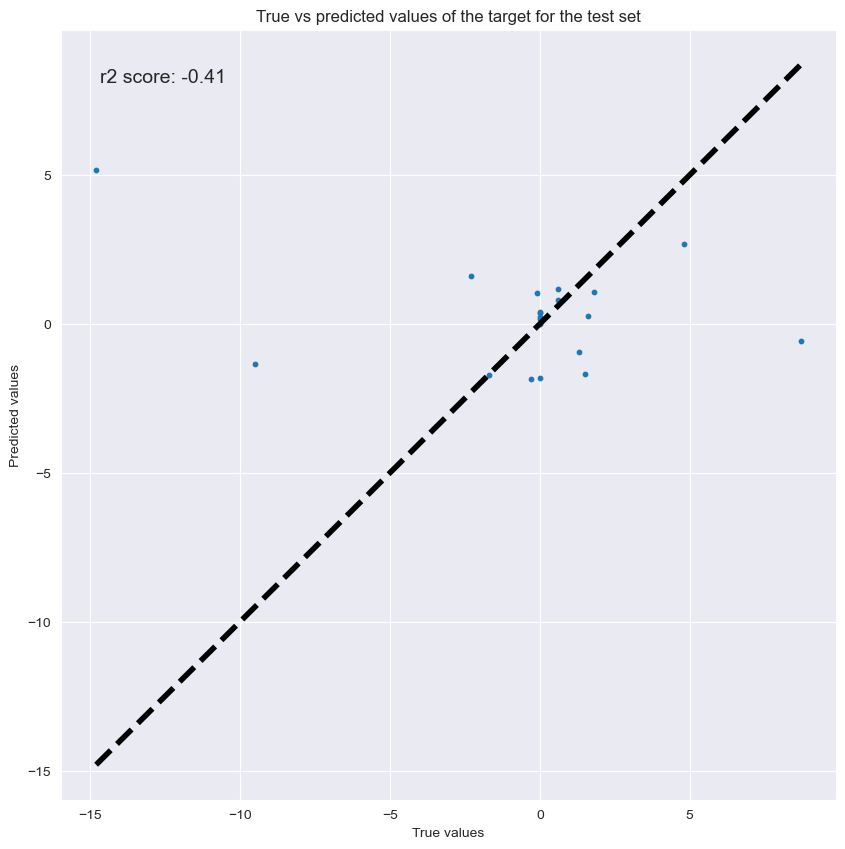

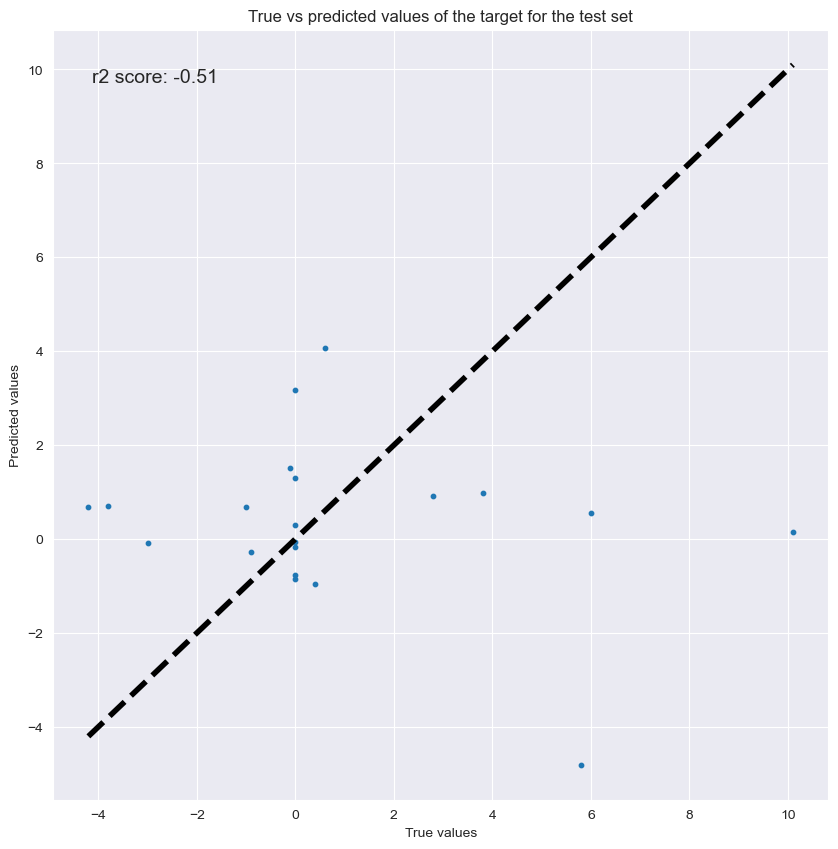

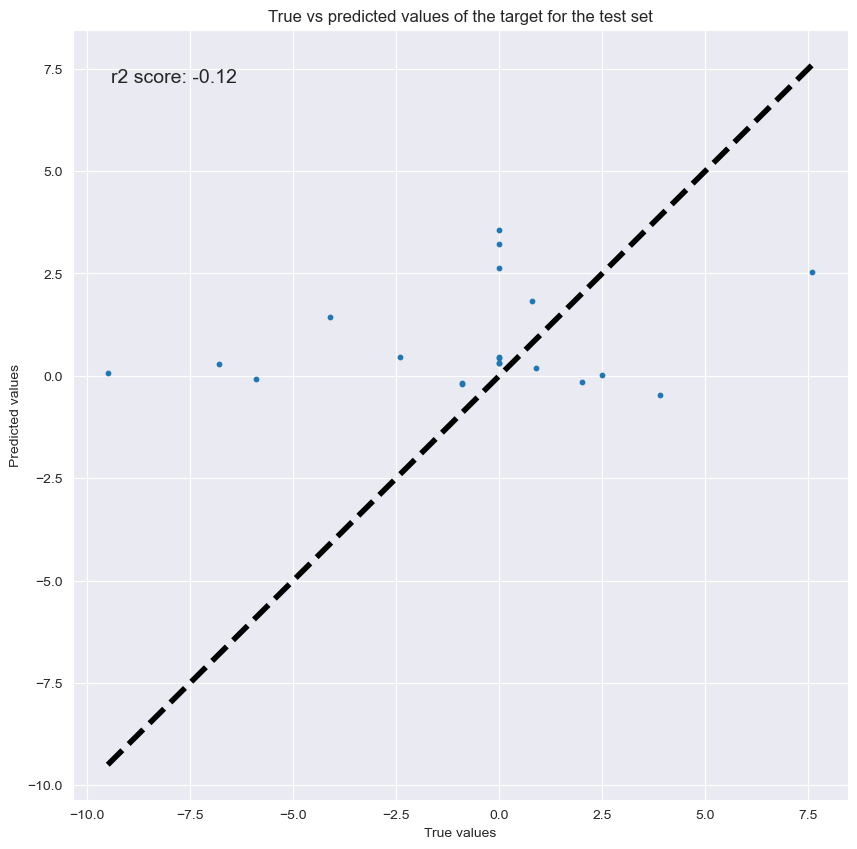

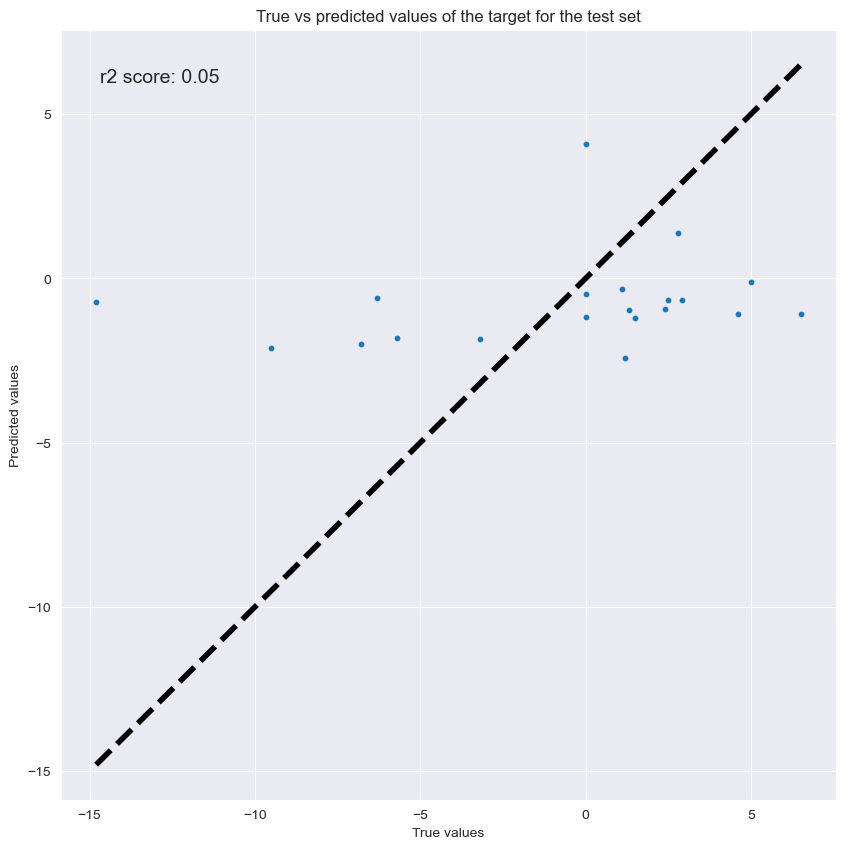

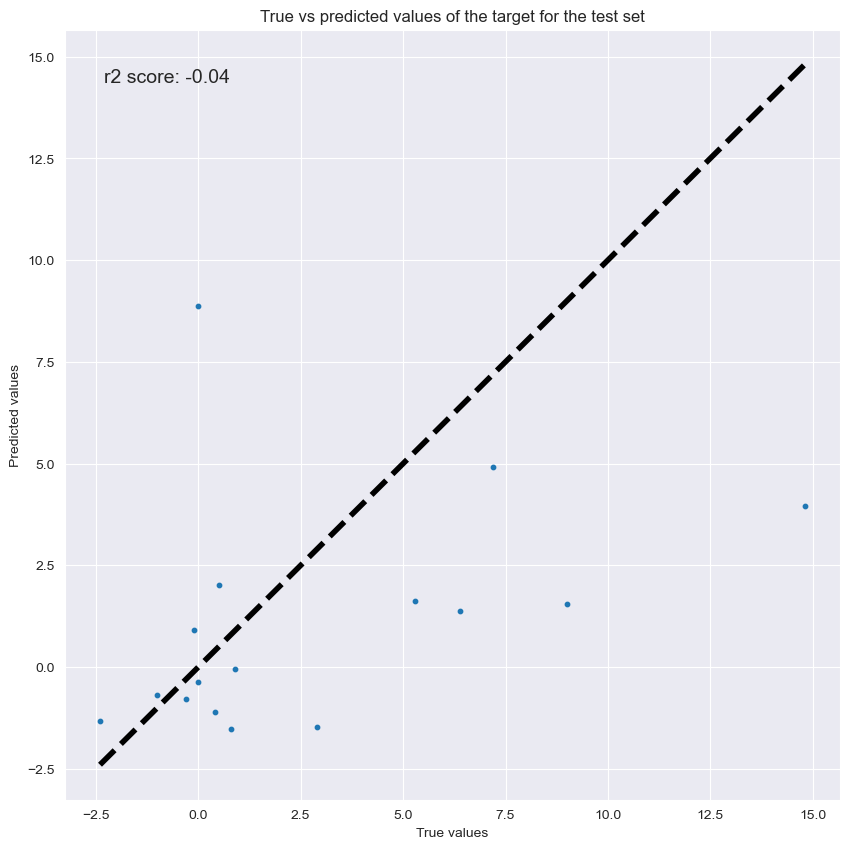

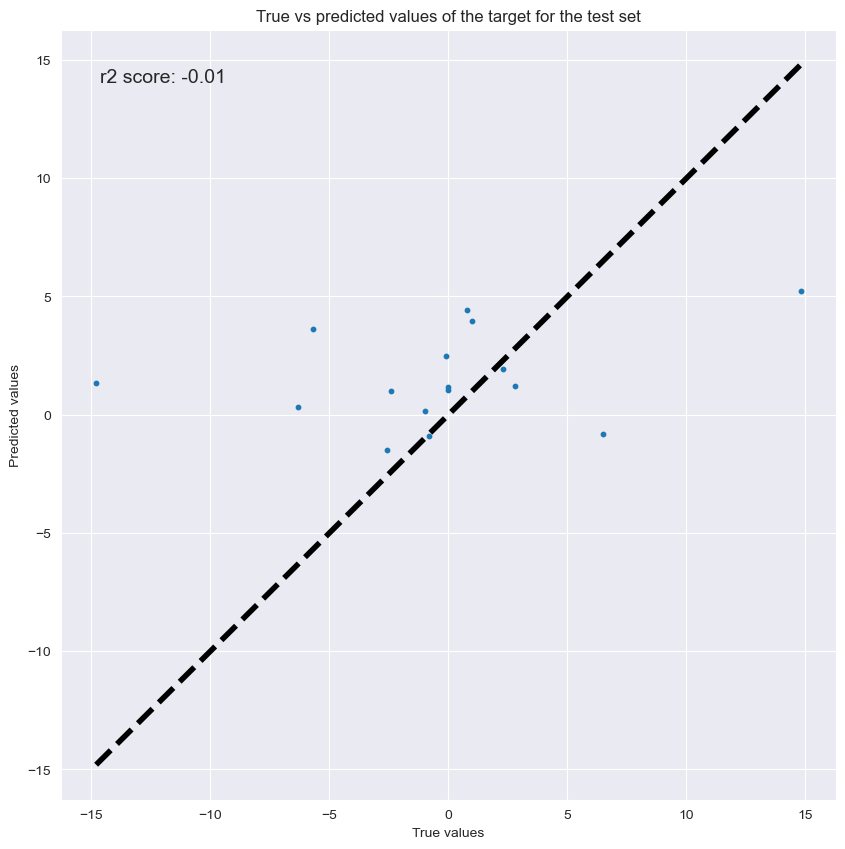

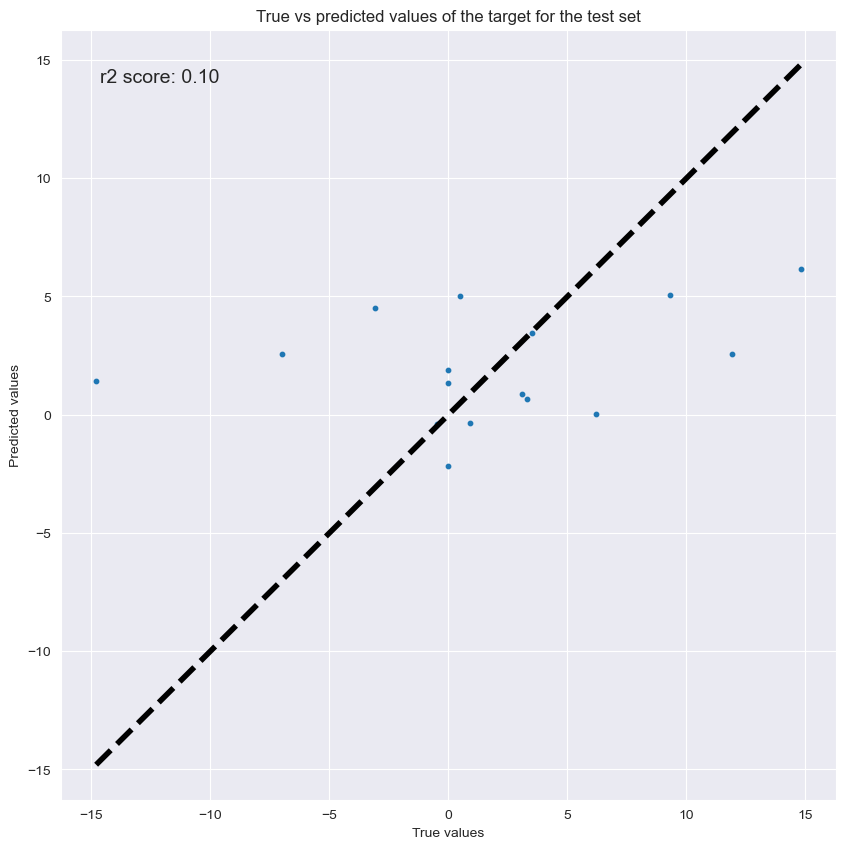

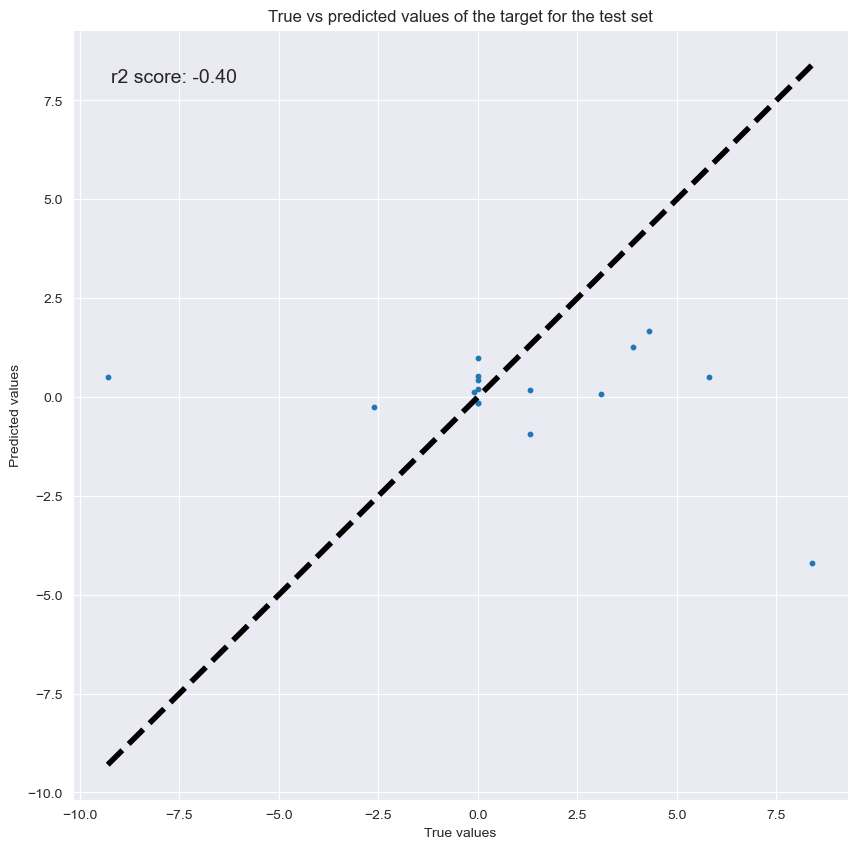

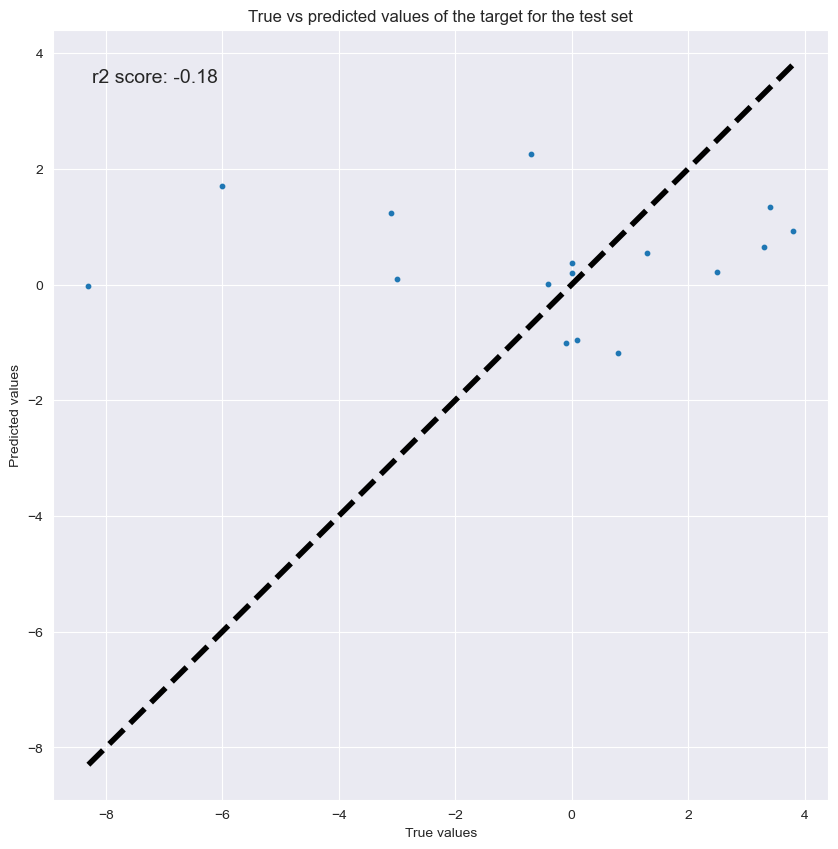

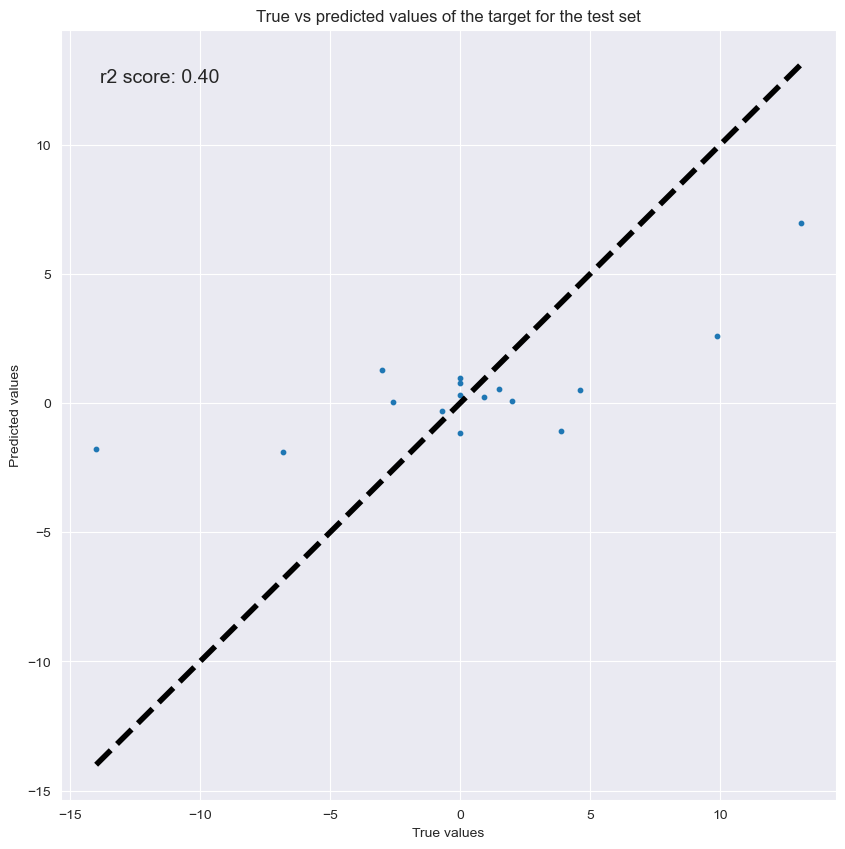

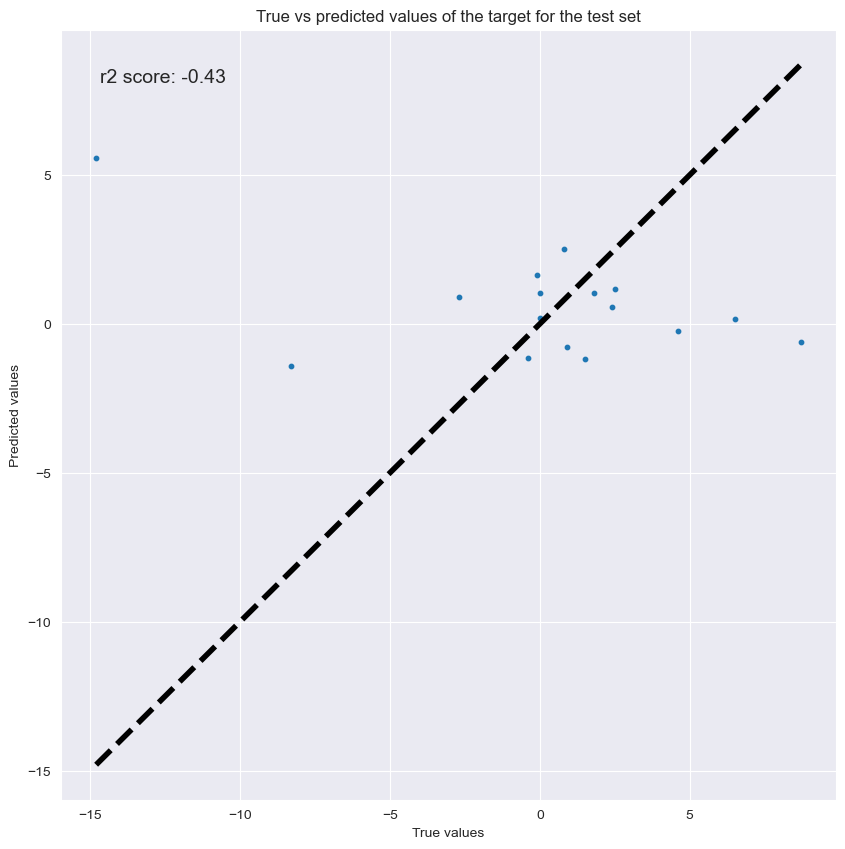

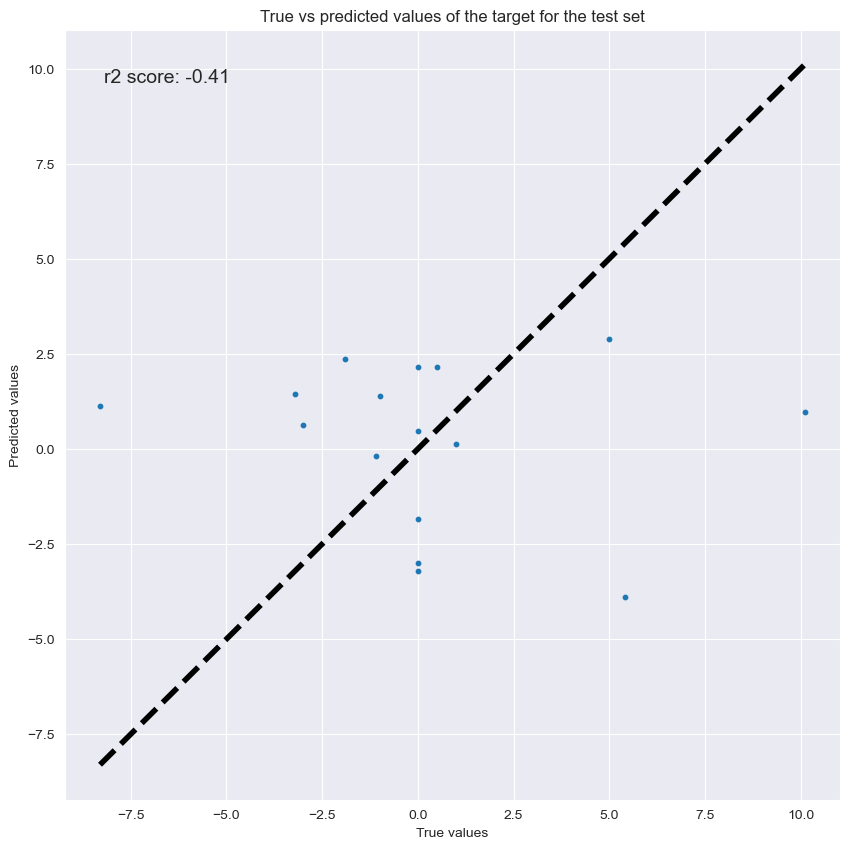

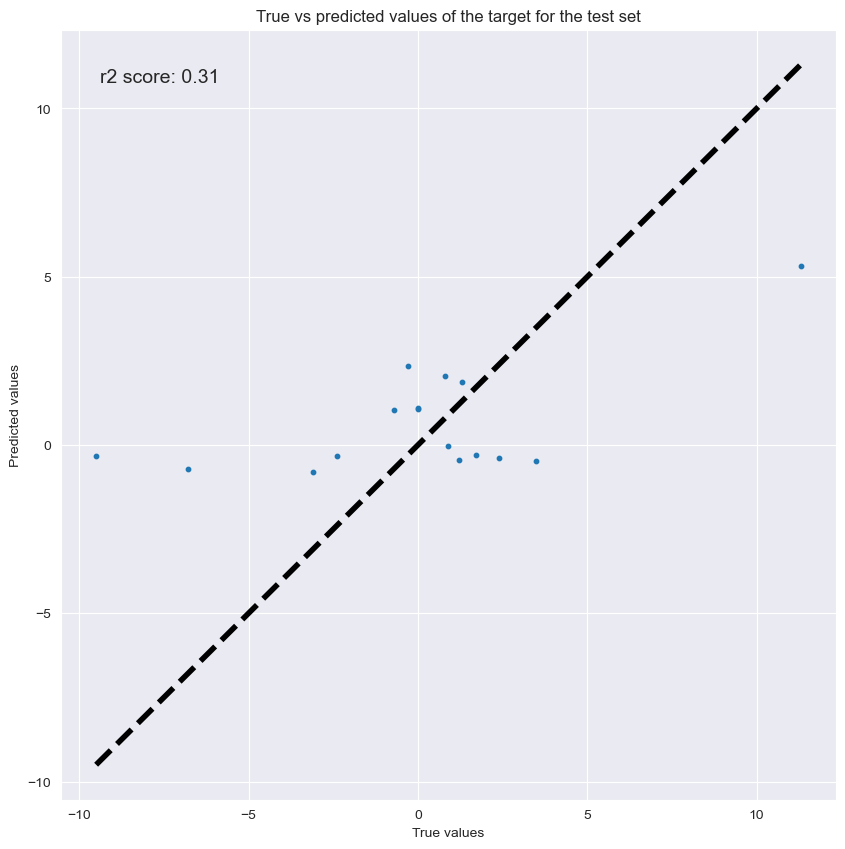

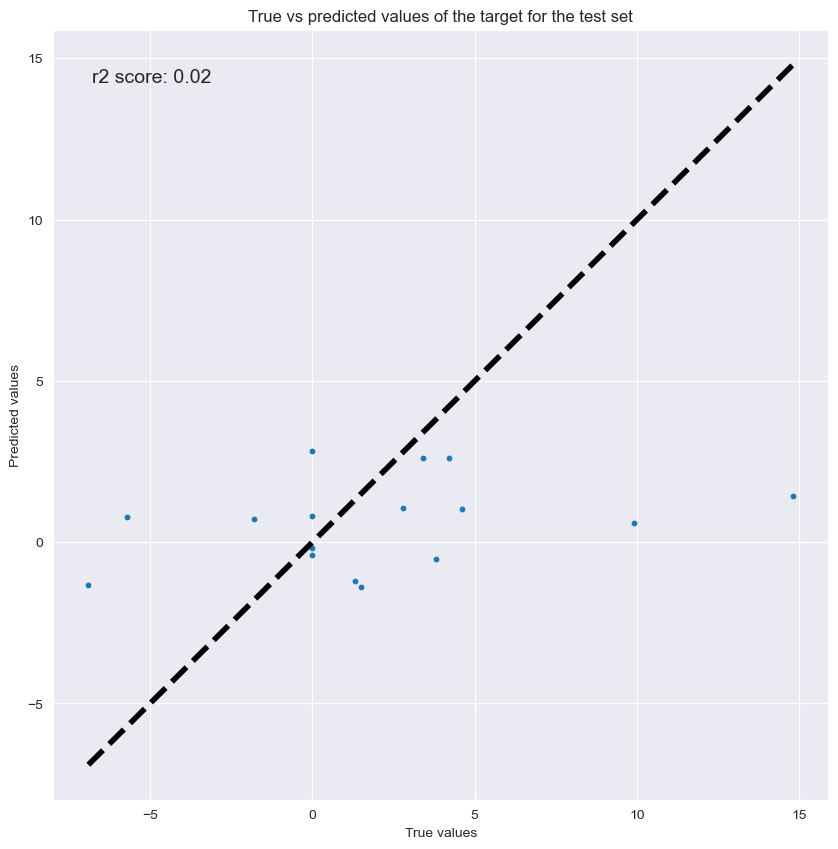

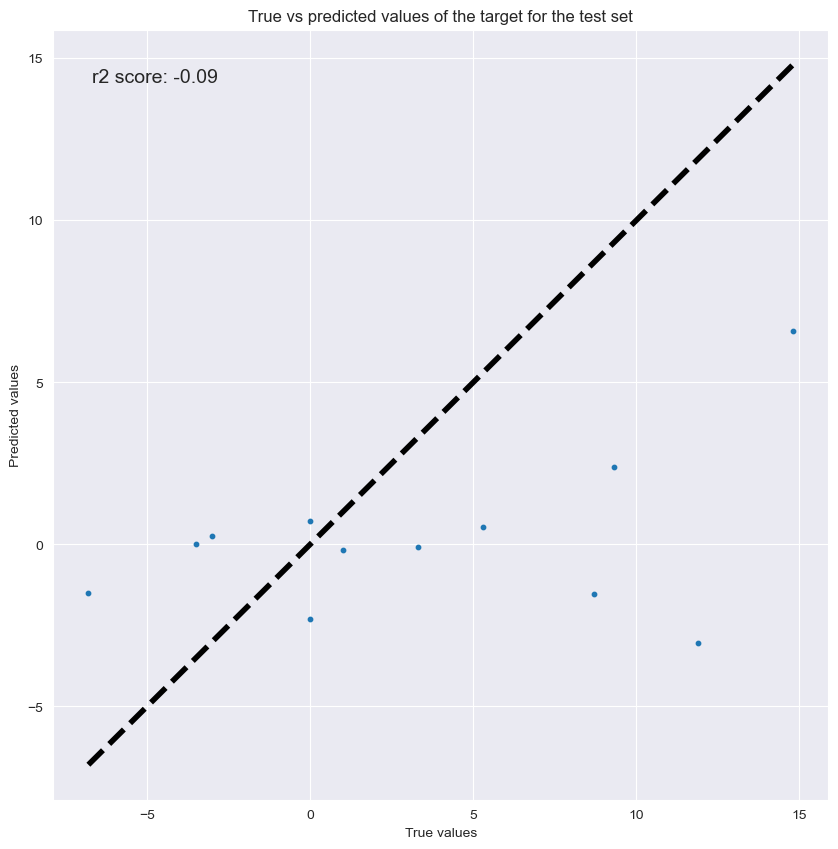

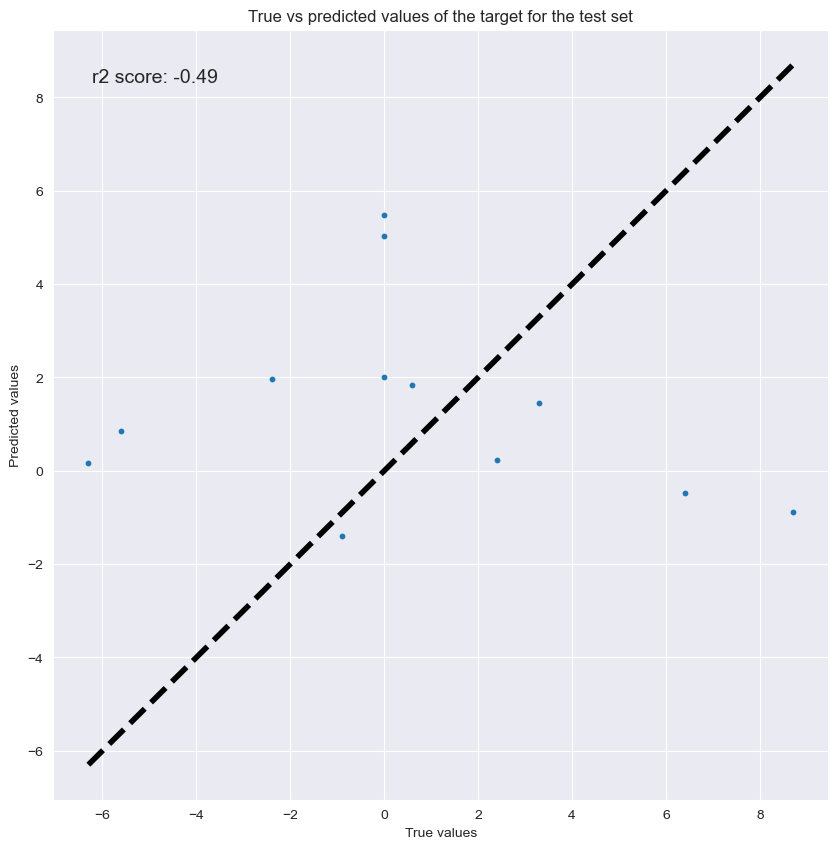

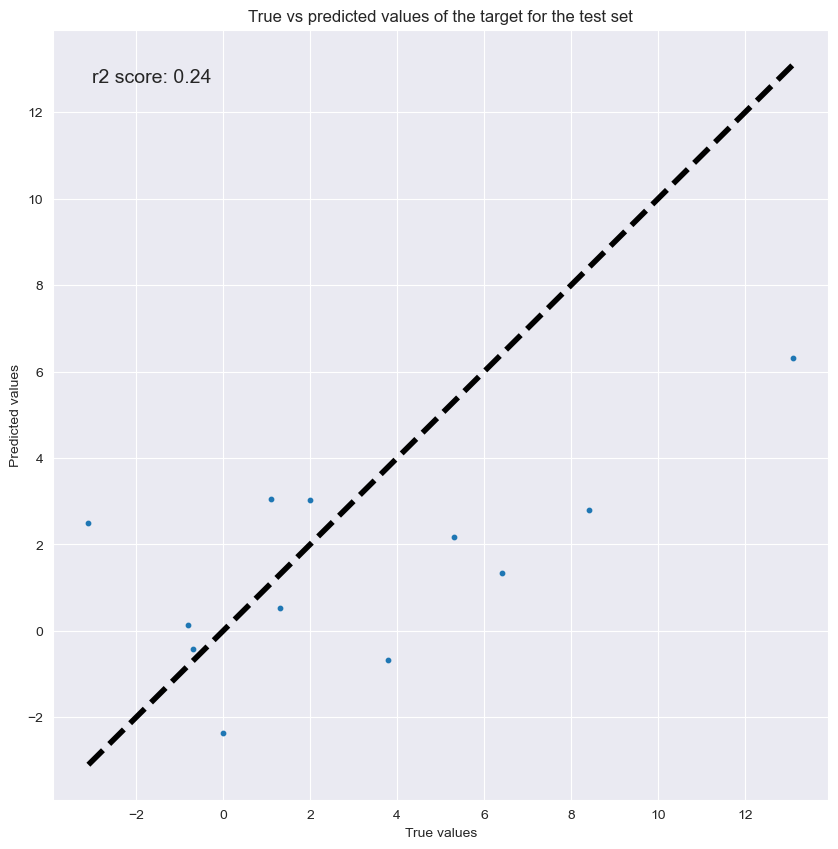

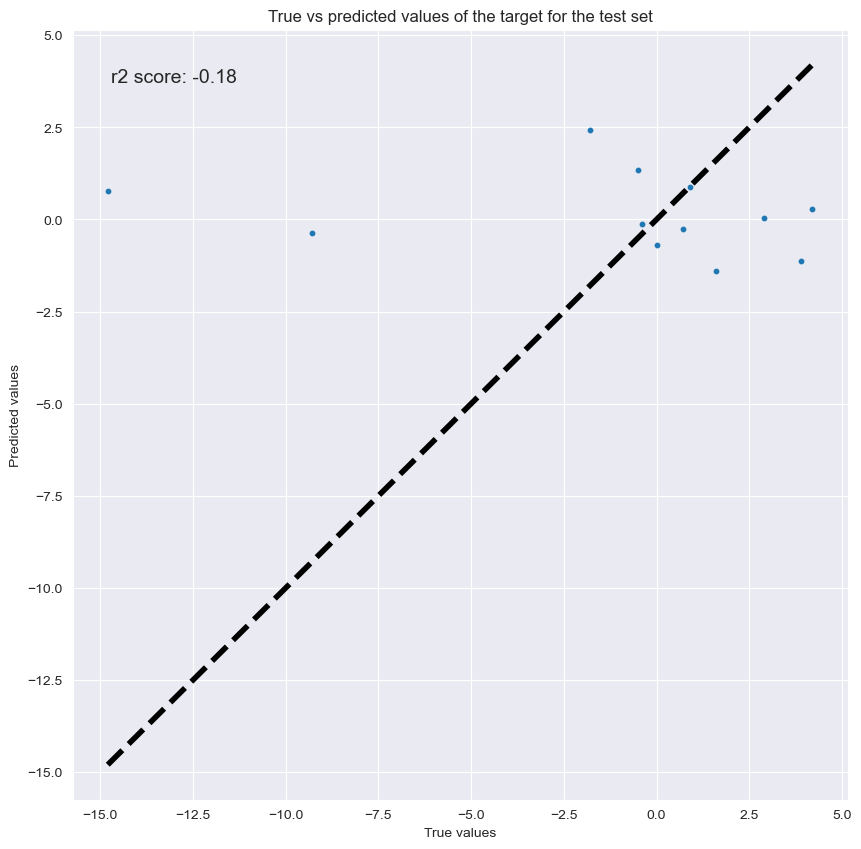

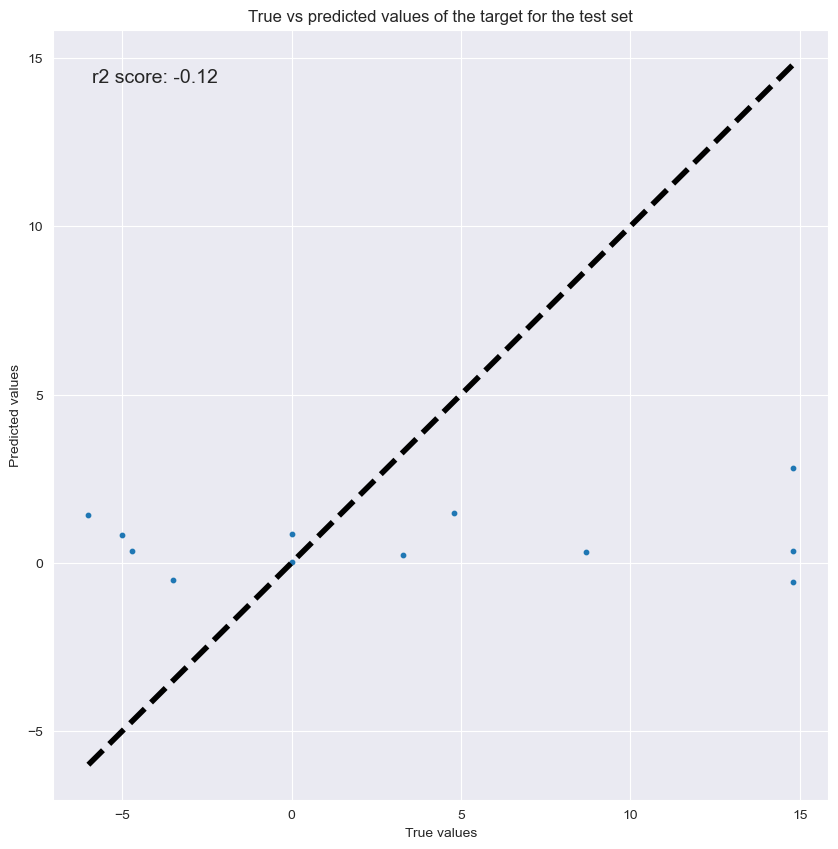

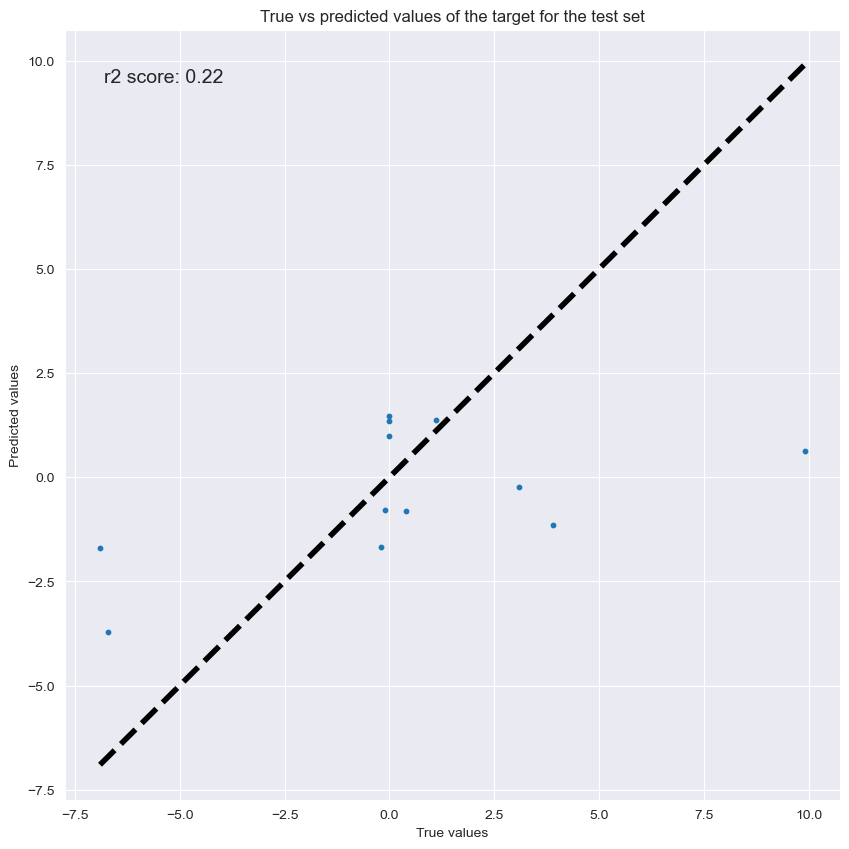

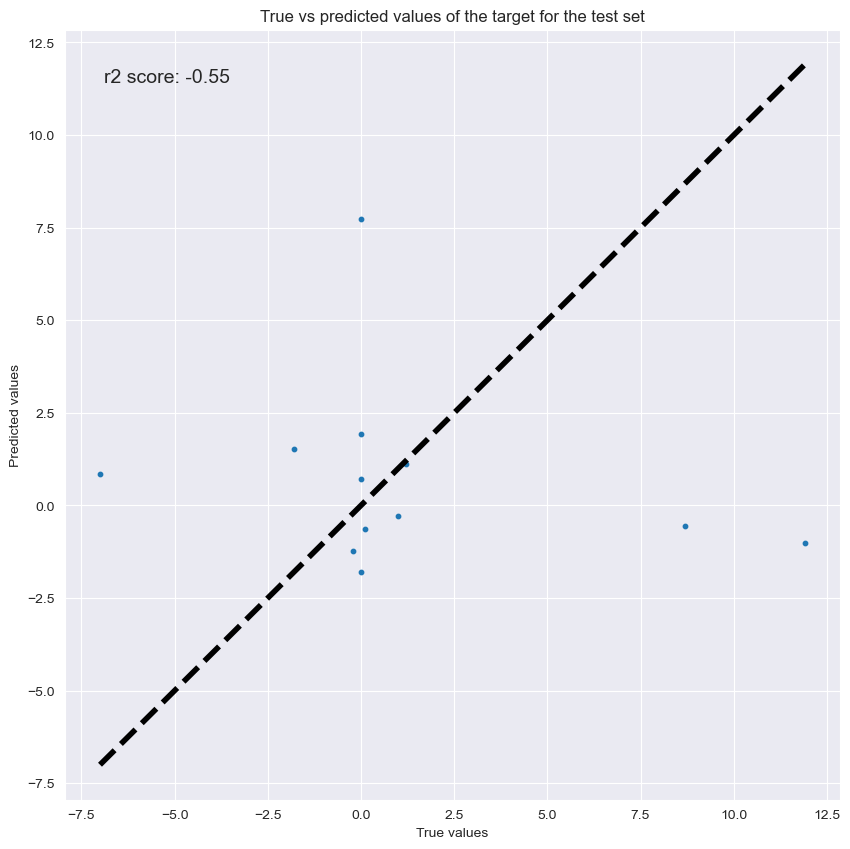

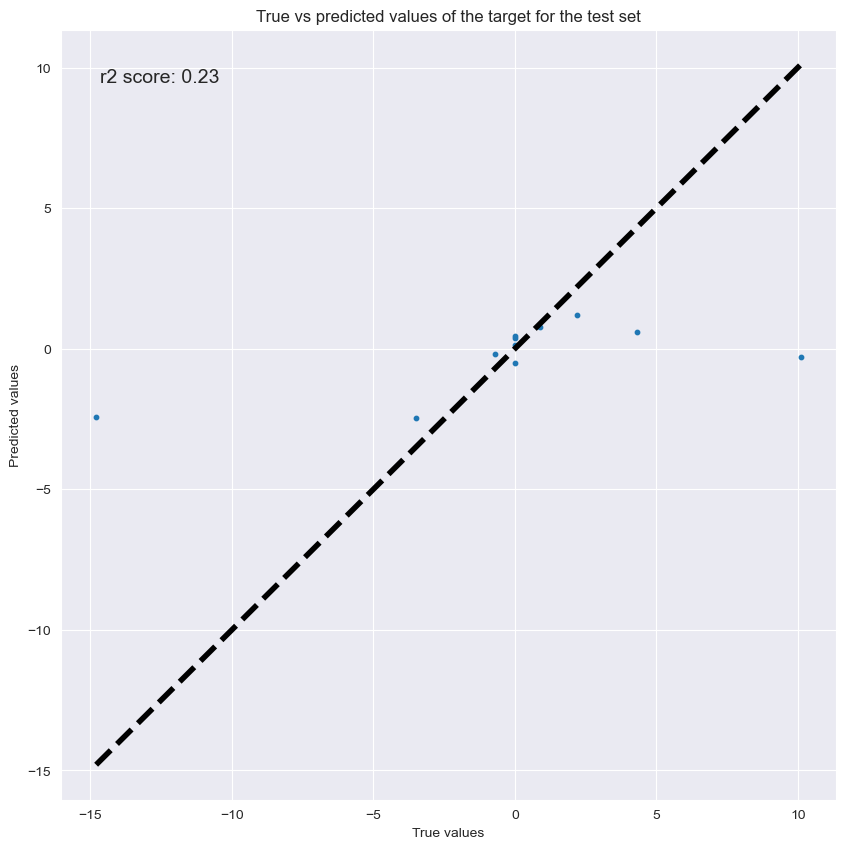

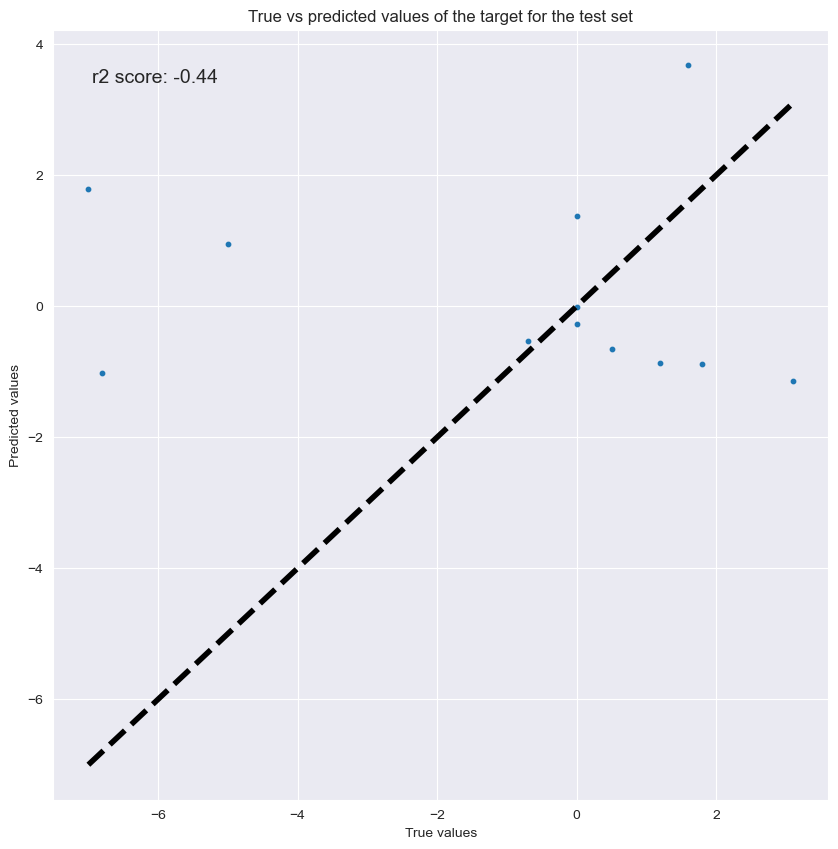

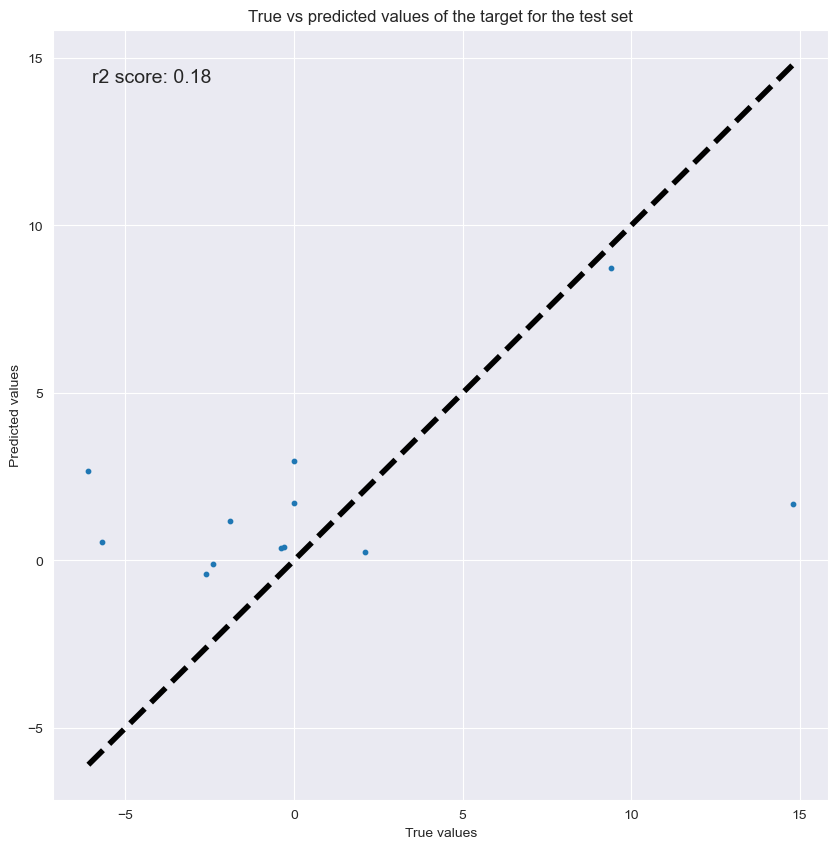

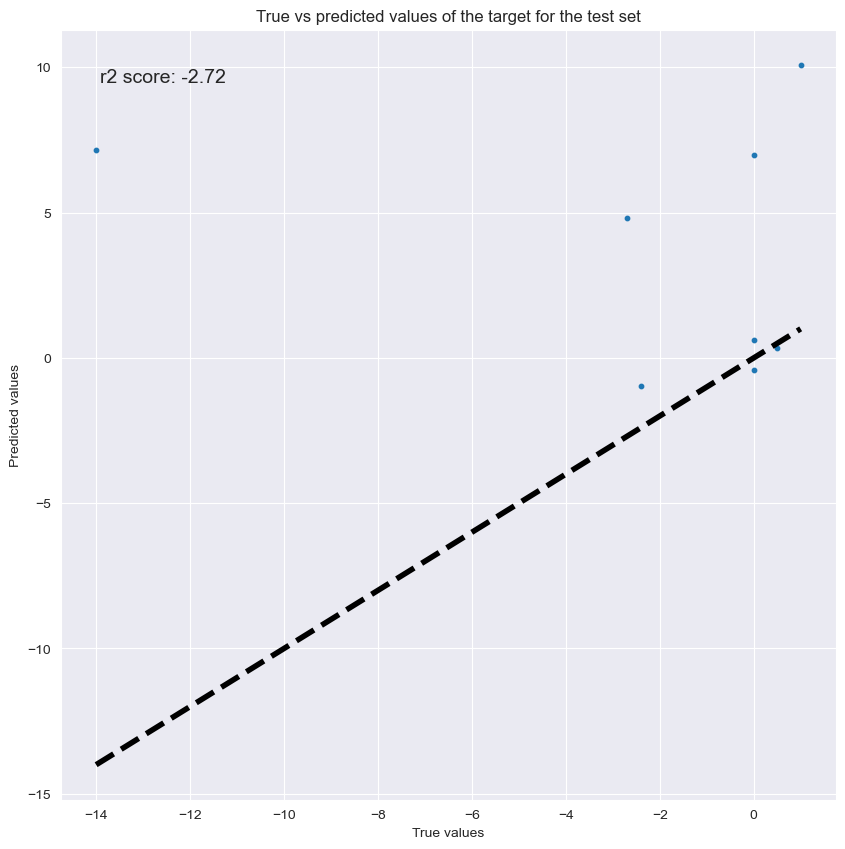

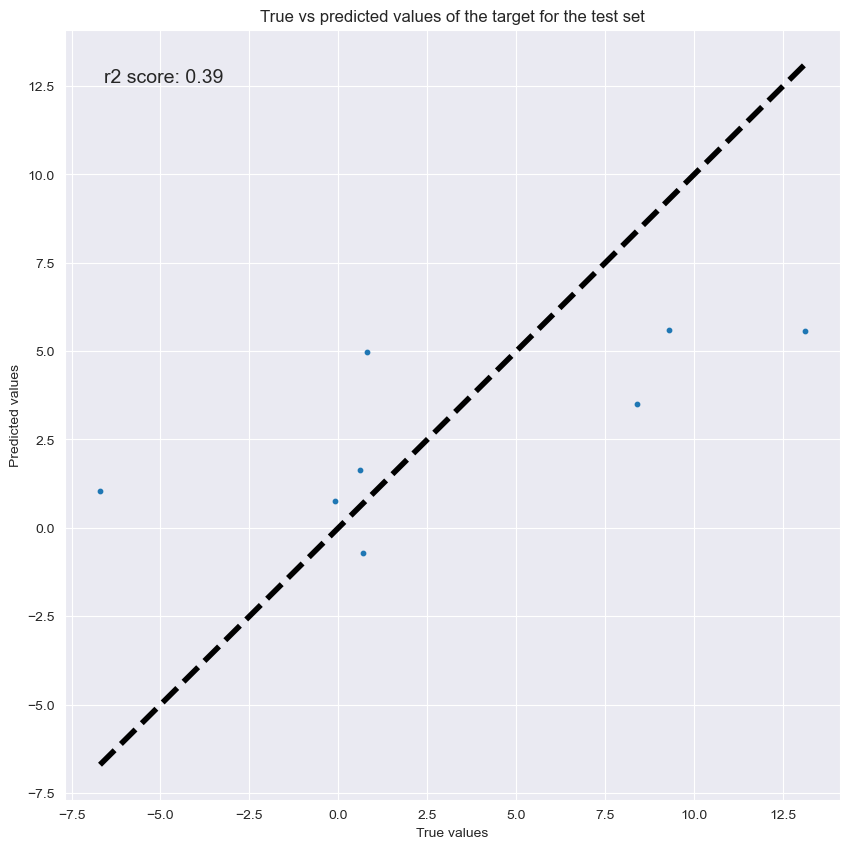

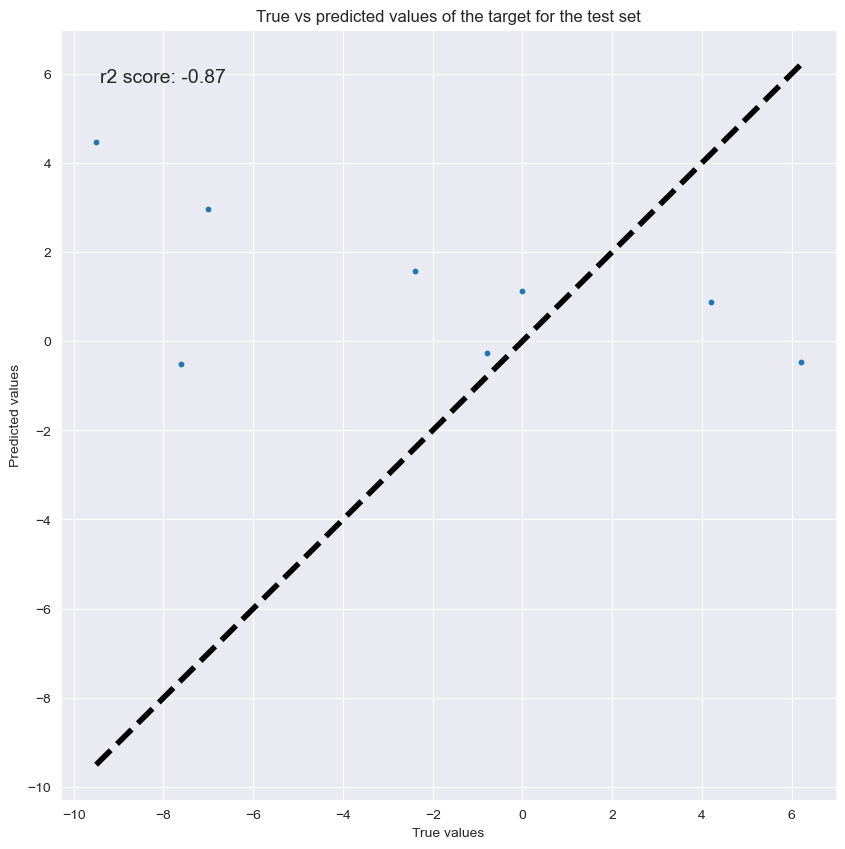

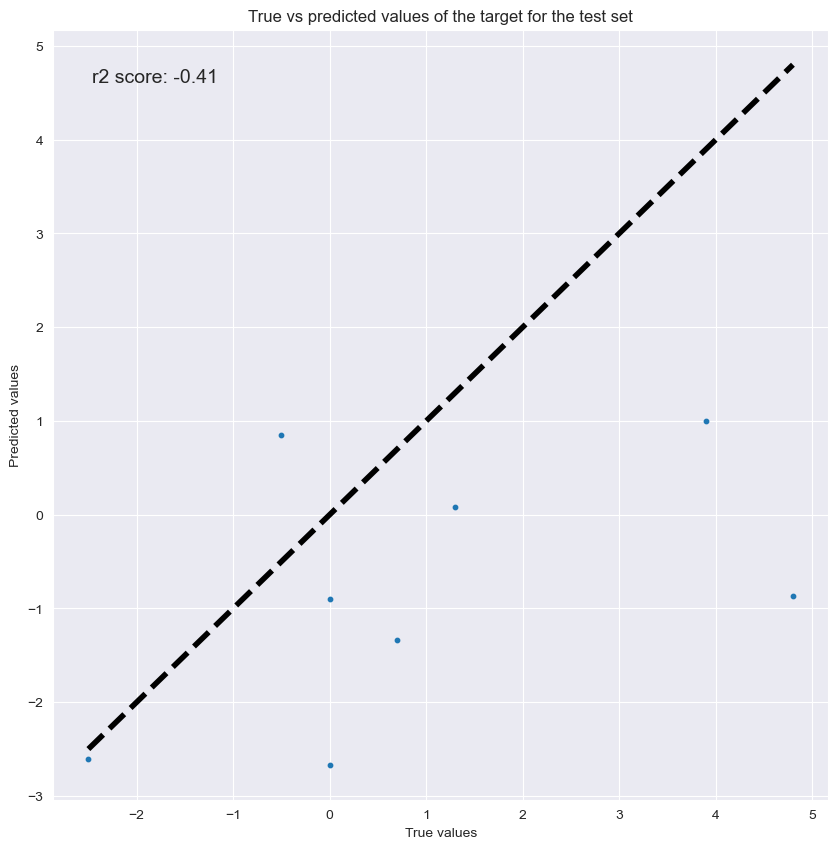

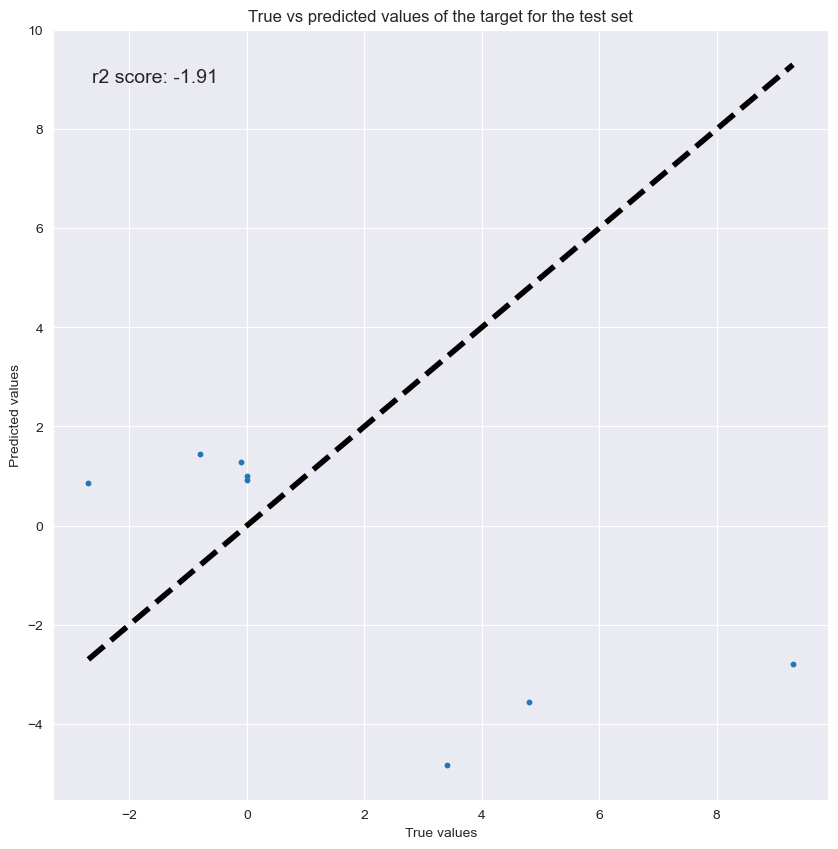

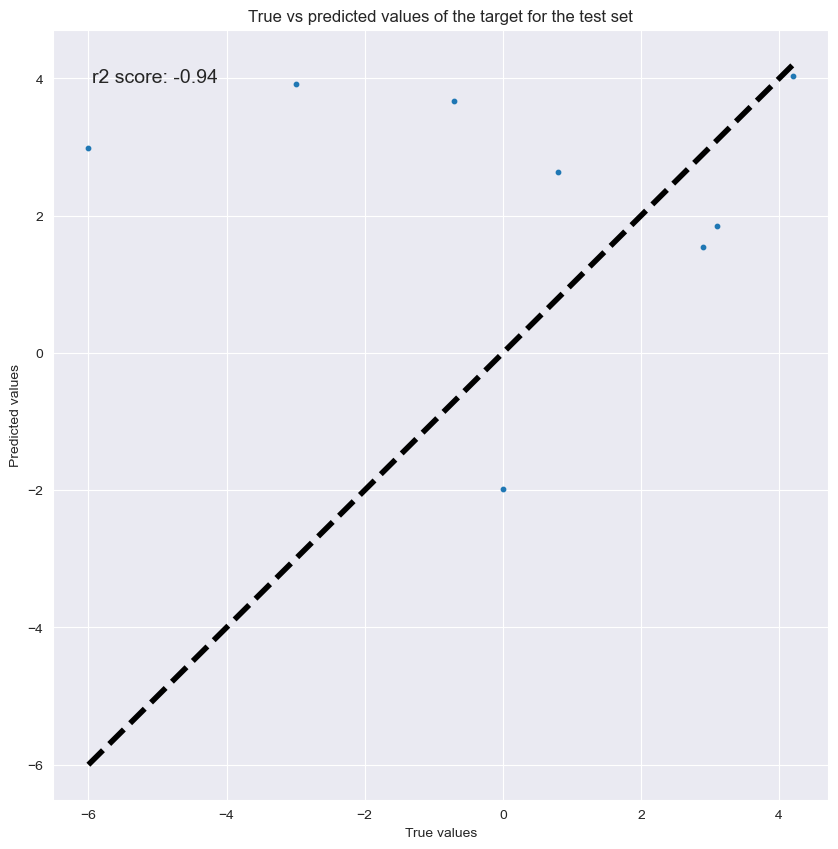

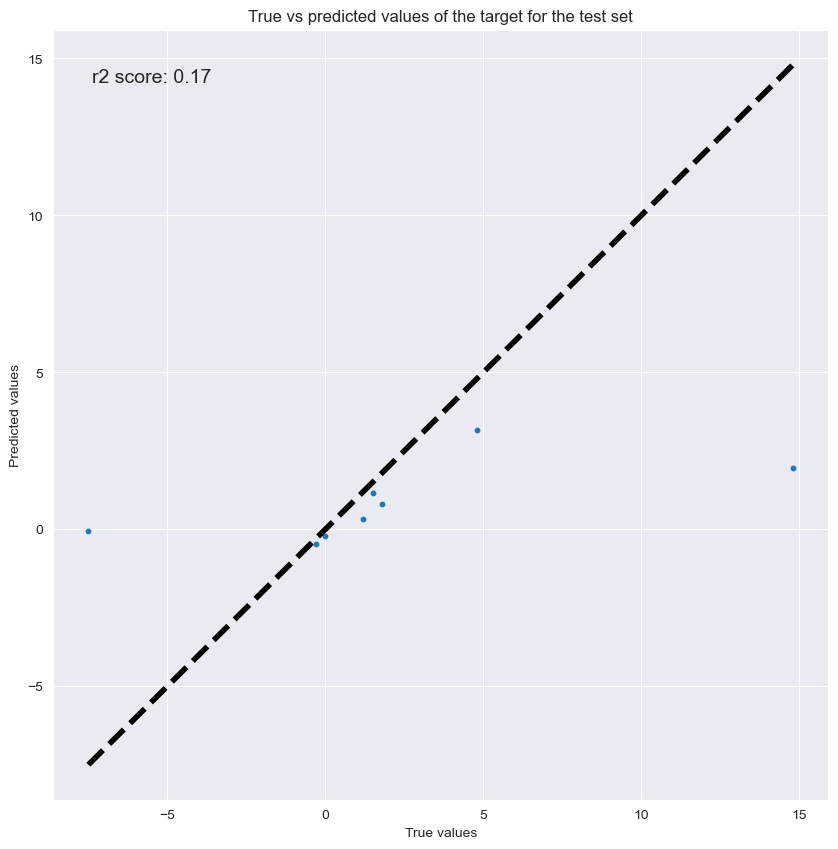

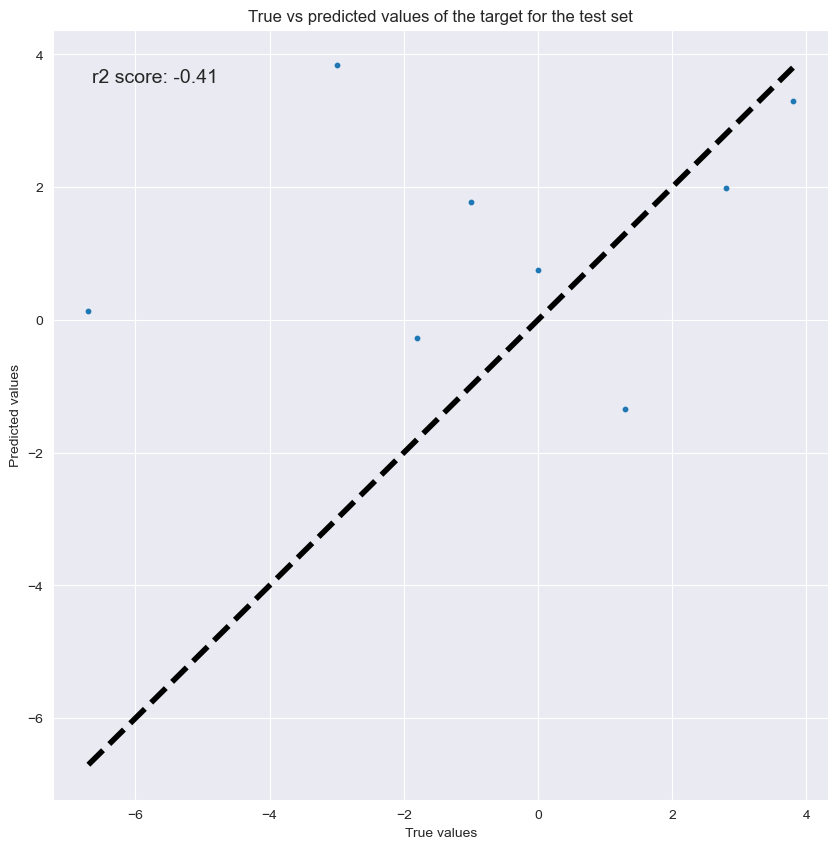

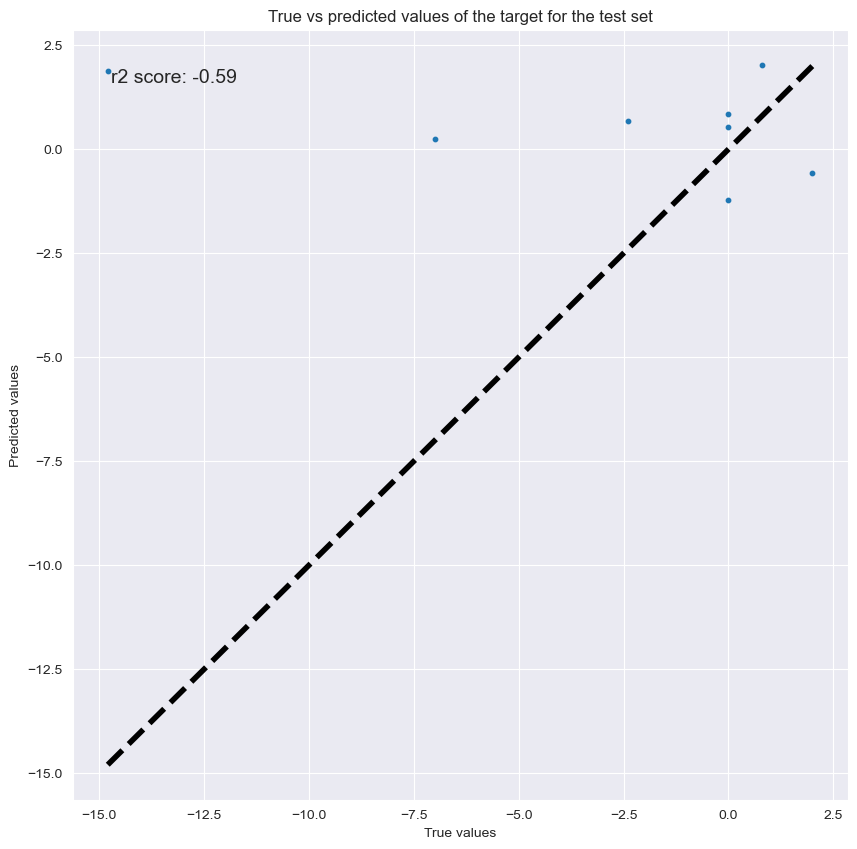

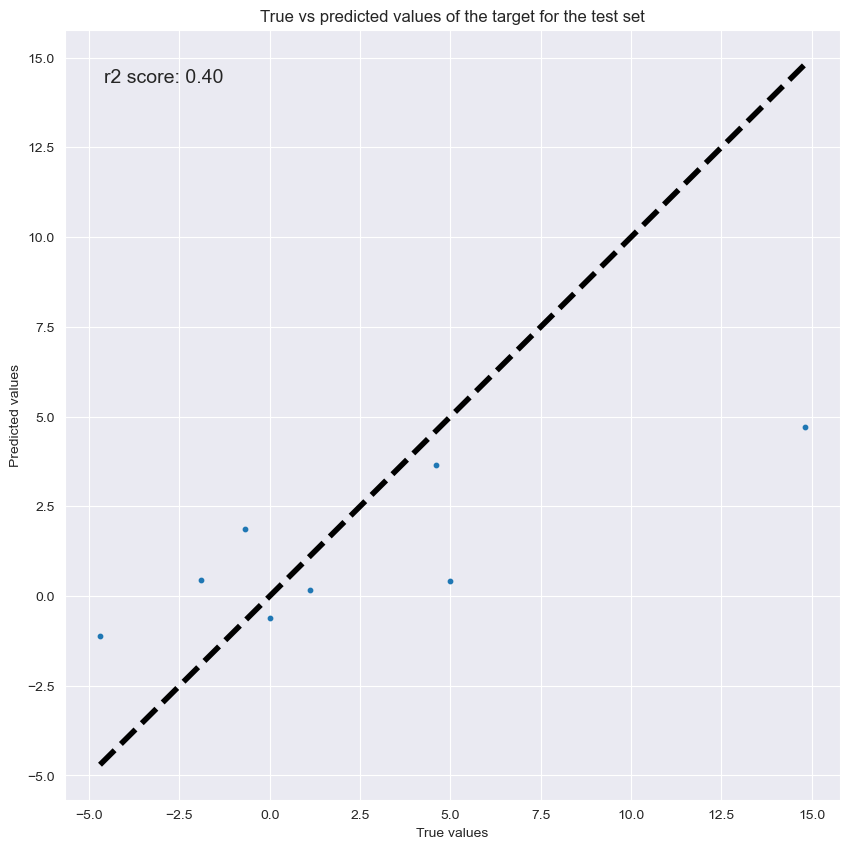

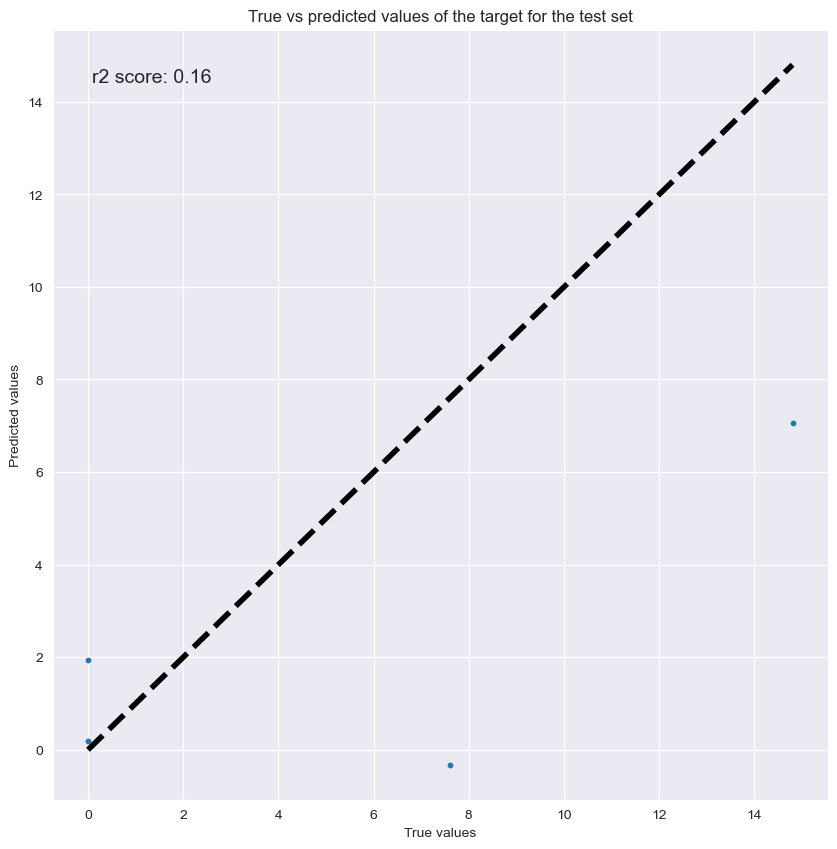

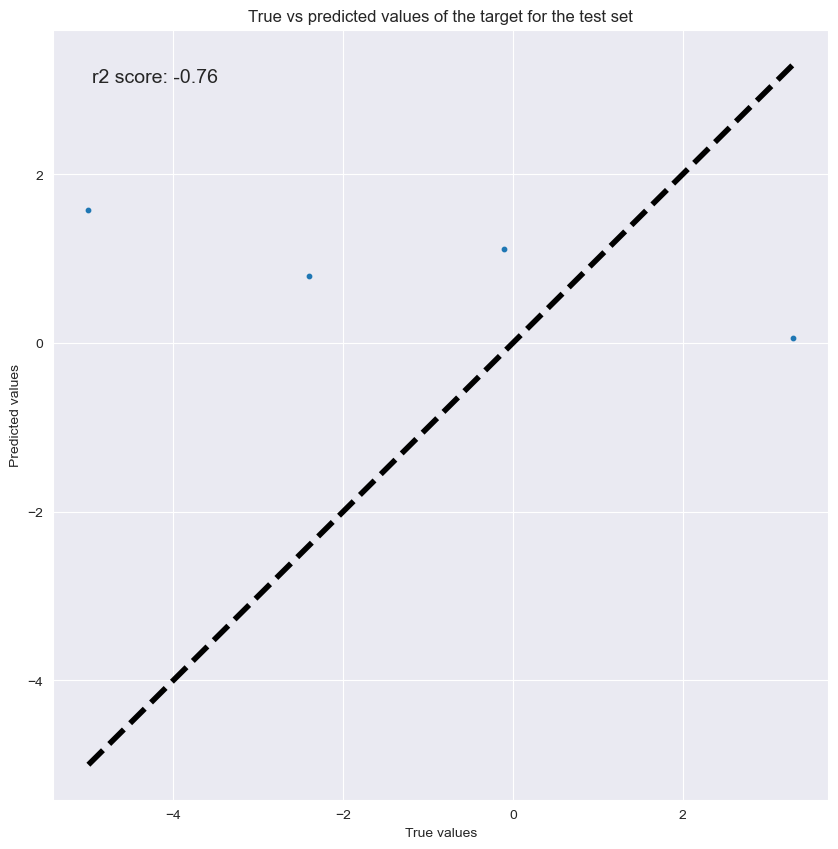

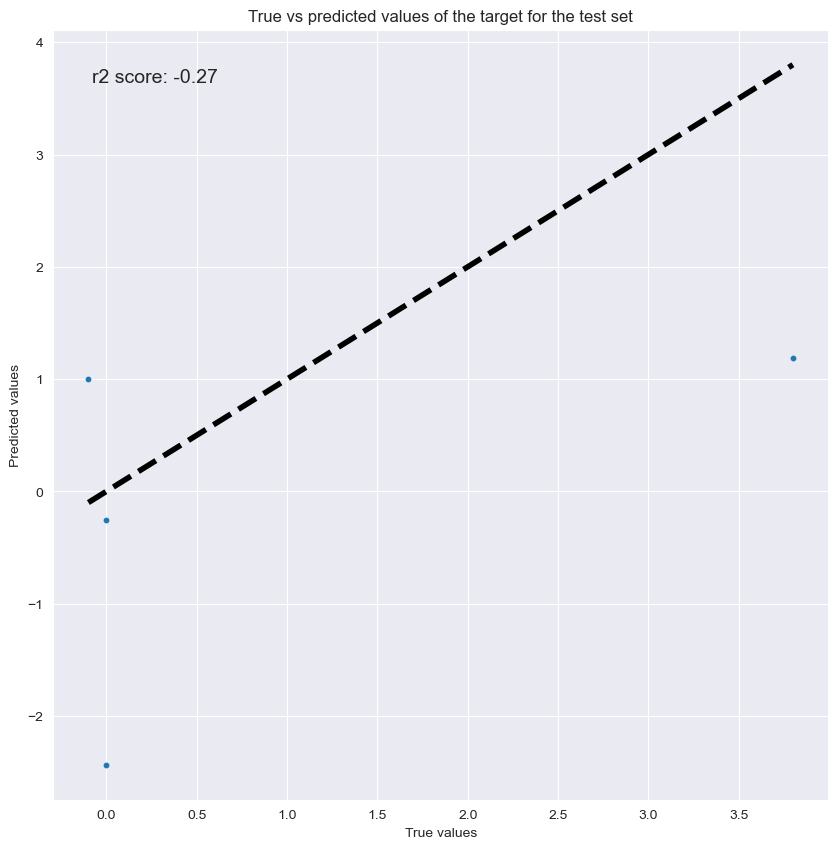

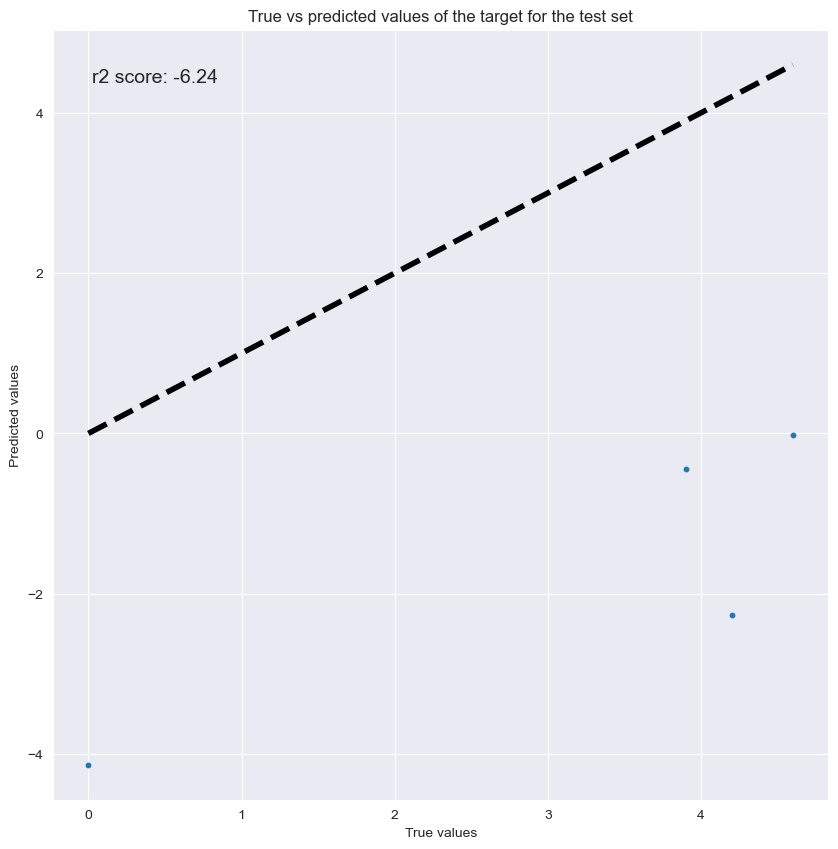

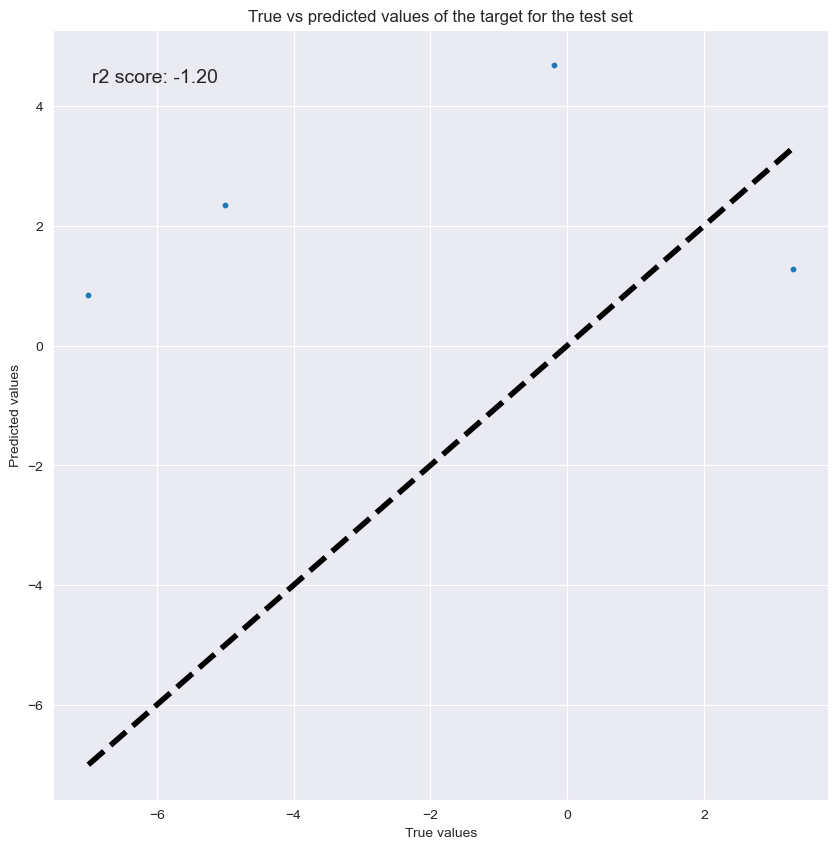

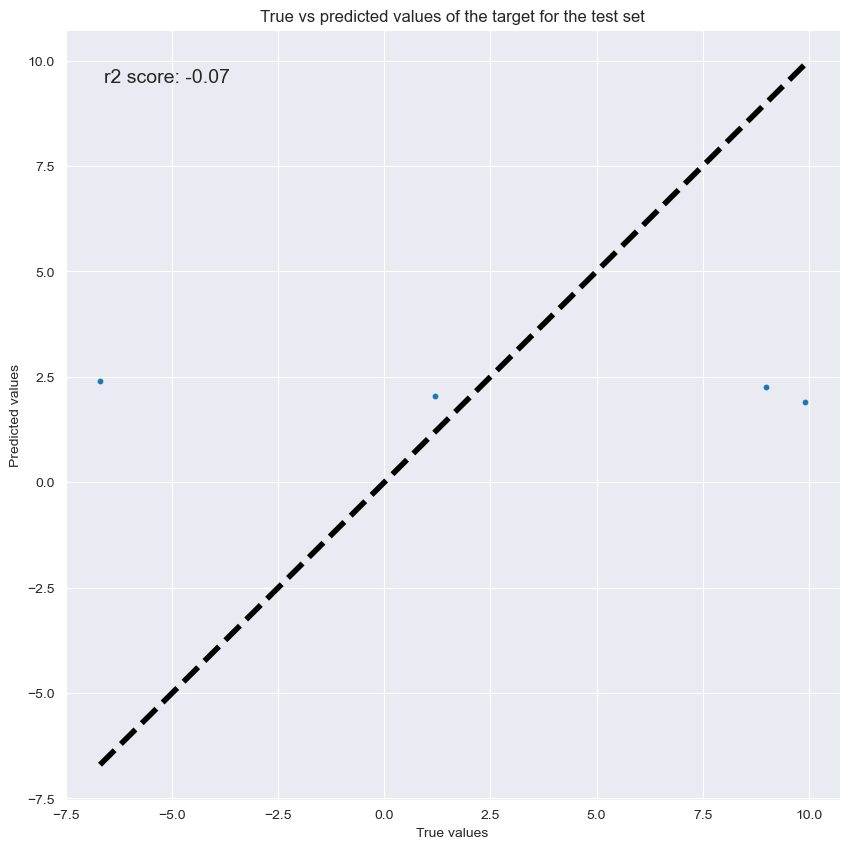

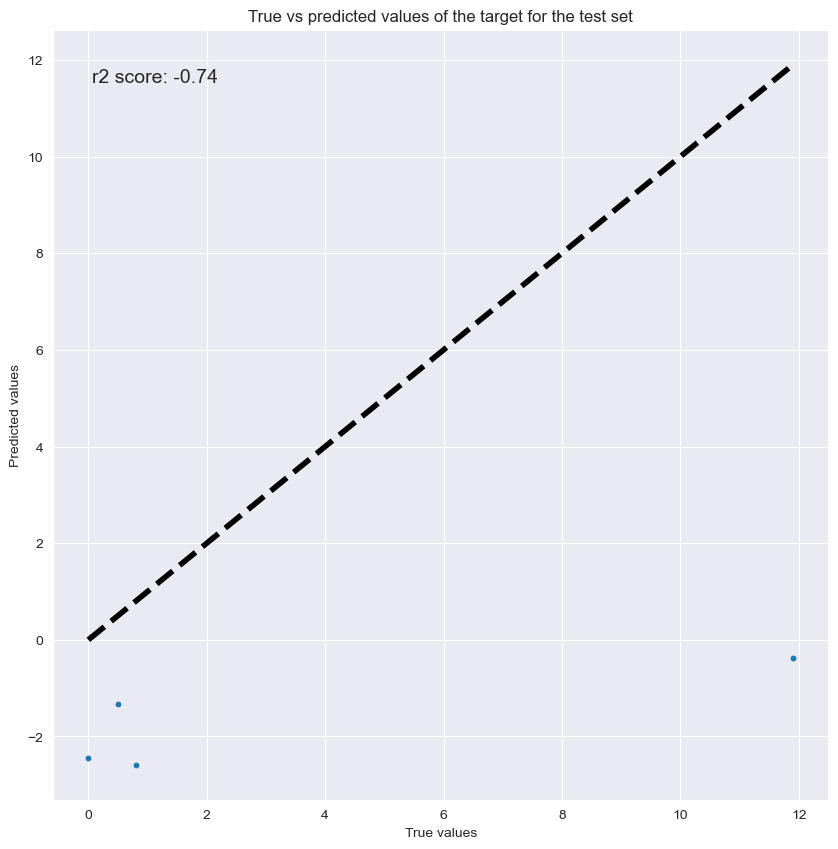

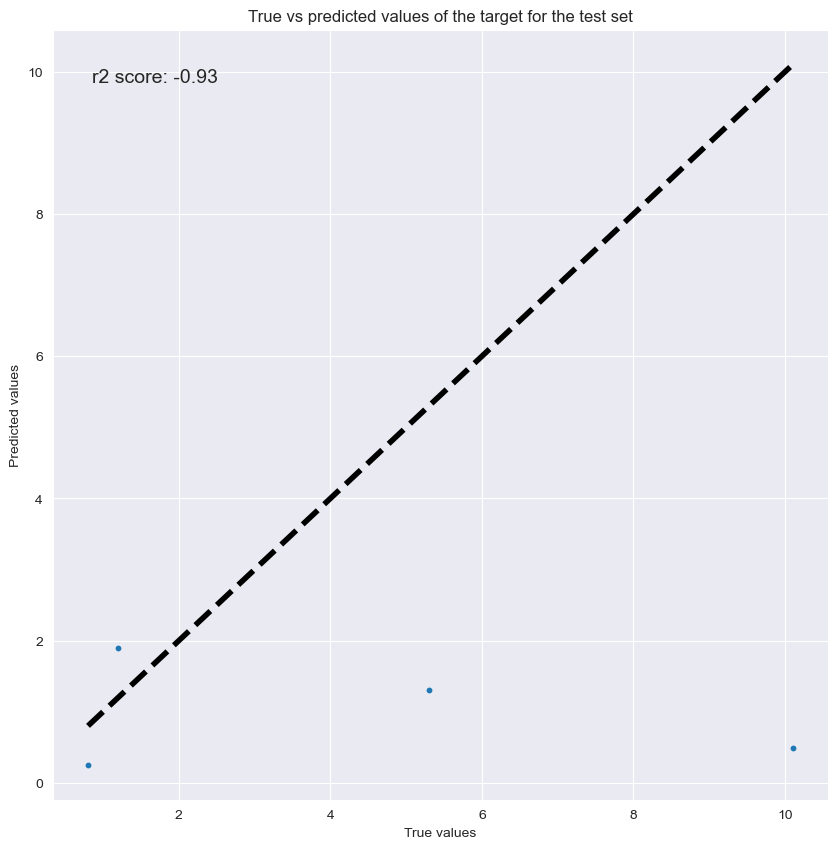

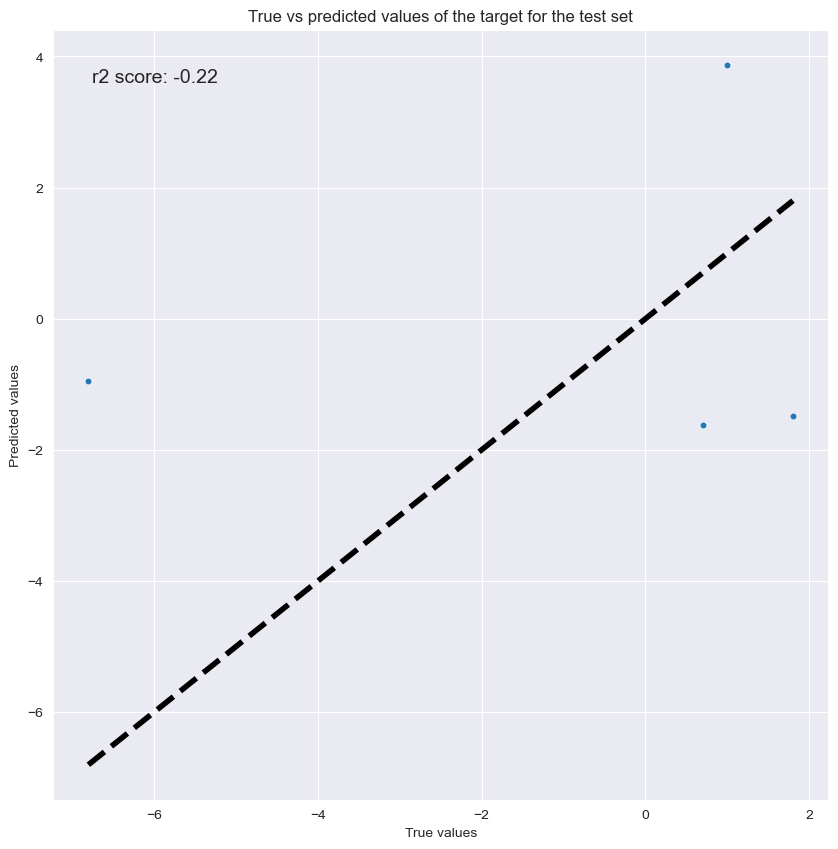

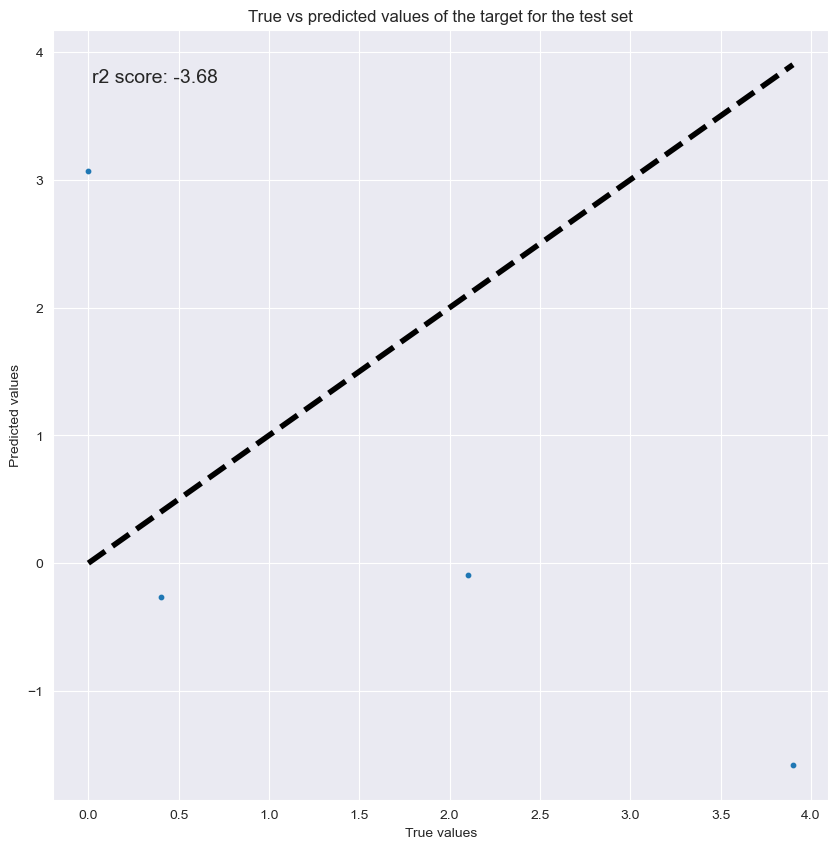

In [3]:
from obelix_ml_pipeline.predictions_within_substrate_class_for_random_subset import predict_within_substrate_class_for_random_subset
# try regression with loaded representations
selected_ligand_representations = ['dft_nbd_model']
target = 'DDG'
target_threshold = None
rf_model = RandomForestRegressor(random_state=42)
scoring = 'r2'
train_splits = 5
n_jobs = int(n_cpu*0.8)  # using 0.8 of the available CPUs for parallelization
binary = False
plot_dendrograms = False
substrate_names_column = 'Substrate'
ligand_numbers_column = 'Ligand#'
selected_substrate = 'SM1'
training_size = 0.8  # 80% of data for subset substrate is used for training

subset_random_seeds = np.arange(0, 10, 1)  # 10 different random seeds for selecting a random subset of the data
print_ml_results = True
reduce_train_test_data_dimensionality = False
transformer = None
performance_threshold = 0.75  # loop of decreasing subset size and trying random seeds is stopped when performance is above this threshold

print('Training and testing regression')
print(f'Test size: {1/train_splits}')
res = predict_within_substrate_class_for_random_subset(selected_ligand_representations,
                                ligand_numbers_column, substrate_names_column, target, target_threshold, train_splits, binary,
                                selected_substrate, training_size, rf_model, scoring, print_ml_results, n_jobs, subset_random_seeds, performance_threshold, plot_dendrograms, reduce_train_test_data_dimensionality, transformer)

In [4]:
res.fig_fi

In [ ]:
print(res.testing_performance_test)